#**Deep Learning Assignemnt-1**
# Denster Joseph Frank
# s3894695
# s3894695@student.rmit.edu.au

# Reading Data

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy
from sklearn.model_selection import train_test_split

In [2]:

cd /content/drive/MyDrive/Deep_Learning/data-1

/content/drive/MyDrive/Deep_Learning/data-1


In [3]:
# To read each individual dataframe
face_data=pd.read_csv("/content/drive/MyDrive/Deep_Learning/data-1/data_labels.csv", delimiter=',')

In [4]:
# To see first 5 items of the dataframe
face_data.head(15)

subject  sequence  image_index  \
0     S005         1           11   
1     S010         1           14   
2     S010         2           14   
3     S010         3           18   
4     S010         4           19   
5     S010         5           16   
6     S010         6           15   
7     S011         1           16   
8     S011         2           22   
9     S011         3           14   
10    S011         4           21   
11    S011         5           20   
12    S011         6           13   
13    S014         1           29   
14    S014         2           16   

                                             filepath        file_prefix  \
0   ./cohn-kanade-images/S005/001/S005_001_0000001...  S005_001_00000011   
1   ./cohn-kanade-images/S010/001/S010_001_0000001...  S010_001_00000014   
2   ./cohn-kanade-images/S010/002/S010_002_0000001...  S010_002_00000014   
3   ./cohn-kanade-images/S010/003/S010_003_0000001...  S010_003_00000018   
4   ./cohn-kanade-images/S010/004/S010_004_0000001...  S010_004_00000019   
5   ./cohn-kanade-images/S010/005/S010_005_0000001...  S010_005_00000016   
6   ./cohn-kanade-images/S010/006/S010_006_0000001...  S010_006_00000015   
7   ./cohn-kanade-images/S011/001/S011_001_0000001...  S011_001_00000016   
8   ./cohn-kanade-images/S011/002/S011_002_0000002...  S011_002_00000022   
9   ./cohn-kanade-images/S011/003/S011_003_0000001...  S011_003_00000014   
10  ./cohn-kanade-images/S011/004/S011_004_0000002...  S011_004_00000021   
11  ./cohn-kanade-images/S011/005/S011_005_0000002...  S011_005_00000020   
12  ./cohn-kanade-images/S011/006/S011_006_0000001...  S011_006_00000013   
13  ./cohn-kanade-images/S014/001/S014_001_0000002...  S014_001_00000029   
14  ./cohn-kanade-images/S014/002/S014_002_0000001...  S014_002_00000016   

    AU17  AU1  AU2  AU25  AU27  ...  AU7  AU23  AU24  AU6  AU12  AU15  AU14  \
0      1    0    0     0     0  ...    0     0     0    0     0     0     0   
1      0    1    1     1     0  ...    0     0     0    0     0     0     0   
2      0    1    1     1     1  ...    0     0     0    0     0     0     0   
3      1    0    0     0     0  ...    0     0     0    0     0     0     0   
4      1    0    0     0     0  ...    1     1     1    0     0     0     0   
5      0    0    0     1     0  ...    1     0     0    1     0     0     0   
6      0    0    0     1     0  ...    0     0     0    1     1     0     0   
7      0    1    1     1     1  ...    0     0     0    0     0     0     0   
8      1    1    0     0     0  ...    0     0     0    0     0     1     0   
9      0    1    0     1     0  ...    1     0     0    0     0     0     0   
10     1    0    0     0     0  ...    1     1     1    0     0     0     0   
11     0    0    0     1     0  ...    1     0     0    0     0     0     0   
12     0    0    0     1     0  ...    0     0     0    1     1     0     0   
13     0    1    1     1     1  ...    0     0     0    0     1     0     0   
14     1    1    0     0     0  ...    0     0     0    0     0     1     0   

    AU11  AU26  high_level_emotion  
0      0     0            negative  
1      0     0            negative  
2      0     0            surprise  
3      0     0            negative  
4      0     0            negative  
5      0     0            negative  
6      0     0            positive  
7      0     0            surprise  
8      0     0            negative  
9      0     0            negative  
10     0     0            negative  
11     0     0            negative  
12     0     0            positive  
13     0     0            surprise  
14     0     0            negative  

[15 rows x 21 columns]

In [5]:
# Working on copy of data,  original data will be safe
df_face_data=face_data.copy()

In [6]:
# To find shape of dataframe
df_face_data.shape

(560, 21)

This data shows pictures of people's faces displaying various emotions. Each row contains information like the person's ID, the picture's name, and the emotions they are showing. To work with this data, a computer program in Python and a tool called Pandas are used. The data is loaded from a file and organized like a dataframe using Pandas. The first few rows of the data are checked to understand the data. A copy of the dataframeis made to avoid changing the original data. Lastly, the size of the dataframe (560, 21) is checked to ensure everything is going well. This process helps prepare the data for studying and understanding different facial expressions.

# Data Cleaning

### Checking for Null Values

In [7]:
#To check is there any null value
df_face_data.isnull().values.any()

False

In [8]:
#To check percentage of null values in each column
df_face_data.isnull().sum()*100/len(df_face_data)

subject               0.0
sequence              0.0
image_index           0.0
filepath              0.0
file_prefix           0.0
AU17                  0.0
AU1                   0.0
AU2                   0.0
AU25                  0.0
AU27                  0.0
AU4                   0.0
AU7                   0.0
AU23                  0.0
AU24                  0.0
AU6                   0.0
AU12                  0.0
AU15                  0.0
AU14                  0.0
AU11                  0.0
AU26                  0.0
high_level_emotion    0.0
dtype: float64

In [9]:
# Checking for duplicate rows
df_face_data.duplicated().any()

False

In [10]:
#To check datatypes of given dataframe
df_face_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   subject             560 non-null    object
 1   sequence            560 non-null    int64 
 2   image_index         560 non-null    int64 
 3   filepath            560 non-null    object
 4   file_prefix         560 non-null    object
 5   AU17                560 non-null    int64 
 6   AU1                 560 non-null    int64 
 7   AU2                 560 non-null    int64 
 8   AU25                560 non-null    int64 
 9   AU27                560 non-null    int64 
 10  AU4                 560 non-null    int64 
 11  AU7                 560 non-null    int64 
 12  AU23                560 non-null    int64 
 13  AU24                560 non-null    int64 
 14  AU6                 560 non-null    int64 
 15  AU12                560 non-null    int64 
 16  AU15                560 no

In this section, we have found that there are no null values or duplicate rows in the dataset

In [11]:
# One-hot encoding 10 output classes
from sklearn.preprocessing import LabelEncoder
import keras
encode_X = LabelEncoder()
encode_X_fit = encode_X.fit_transform(df_face_data["high_level_emotion"])

In [12]:
df_face_data["high_level_emotion_numeric"]=encode_X_fit
df_face_data.head()

subject  sequence  image_index  \
0    S005         1           11   
1    S010         1           14   
2    S010         2           14   
3    S010         3           18   
4    S010         4           19   

                                            filepath        file_prefix  AU17  \
0  ./cohn-kanade-images/S005/001/S005_001_0000001...  S005_001_00000011     1   
1  ./cohn-kanade-images/S010/001/S010_001_0000001...  S010_001_00000014     0   
2  ./cohn-kanade-images/S010/002/S010_002_0000001...  S010_002_00000014     0   
3  ./cohn-kanade-images/S010/003/S010_003_0000001...  S010_003_00000018     1   
4  ./cohn-kanade-images/S010/004/S010_004_0000001...  S010_004_00000019     1   

   AU1  AU2  AU25  AU27  ...  AU23  AU24  AU6  AU12  AU15  AU14  AU11  AU26  \
0    0    0     0     0  ...     0     0    0     0     0     0     0     0   
1    1    1     1     0  ...     0     0    0     0     0     0     0     0   
2    1    1     1     1  ...     0     0    0     0     0     0     0     0   
3    0    0     0     0  ...     0     0    0     0     0     0     0     0   
4    0    0     0     0  ...     1     1    0     0     0     0     0     0   

   high_level_emotion  high_level_emotion_numeric  
0            negative                           0  
1            negative                           0  
2            surprise                           2  
3            negative                           0  
4            negative                           0  

[5 rows x 22 columns]

I transformed the categorical values in the "high_level_emotion" column into numerical values using a method called Label Encoder. The new column, named "high_level_emotion_numeric," now holds these numeric values. This process helps in numerical representation and analysis of the emotions.

# Splitting the Data

In [13]:
with pd.option_context('mode.chained_assignment', None):
    train_data, test_data = train_test_split(df_face_data, test_size=0.2, random_state=42)
    train_data, val_data = train_test_split(train_data, test_size=0.25, random_state=42)

print("Train data : {}, Val Data: {}, Test Data: {}".format(train_data.shape[0], val_data.shape[0], test_data.shape[0]))

Train data : 336, Val Data: 112, Test Data: 112


The dataset, named "data_labels.csv" was appropriately divided into three subsets: "train_data," "val_data," and "test_data," employing a balanced 3:1:1 ratio. This partitioning strategy ensured a substantial volume of data for training purposes, while still maintaining a significant pool of data for robustly assessing the model's performance on previously unseen instances. Once the data was divided, an Exploratory Data Analysis (EDA) was conducted exclusively on the "train_data" subset, meticulously avoiding any potential data leakage.

# EDA(Exploratory Data Analysis)

### Univariate Data Analysis

In [14]:
train_data.describe()

sequence  image_index        AU17         AU1         AU2  \
count  336.000000   336.000000  336.000000  336.000000  336.000000   
mean     3.541667    18.032738    0.327381    0.333333    0.232143   
std      2.330471     8.699741    0.469957    0.472108    0.422829   
min      1.000000     6.000000    0.000000    0.000000    0.000000   
25%      2.000000    13.000000    0.000000    0.000000    0.000000   
50%      3.000000    17.000000    0.000000    0.000000    0.000000   
75%      5.000000    20.250000    1.000000    1.000000    0.000000   
max     12.000000    71.000000    1.000000    1.000000    1.000000   

             AU25        AU27         AU4         AU7        AU23        AU24  \
count  336.000000  336.000000  336.000000  336.000000  336.000000  336.000000   
mean     0.532738    0.157738    0.333333    0.202381    0.095238    0.086310   
std      0.499671    0.365039    0.472108    0.402374    0.293981    0.281239   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      1.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      1.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              AU6        AU12        AU15        AU14        AU11        AU26  \
count  336.000000  336.000000  336.000000  336.000000  336.000000  336.000000   
mean     0.229167    0.250000    0.142857    0.074405    0.062500    0.080357   
std      0.420924    0.433659    0.350449    0.262820    0.242422    0.272251   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.250000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

       high_level_emotion_numeric  
count                  336.000000  
mean                     0.669643  
std                      0.810989  
min                      0.000000  
25%                      0.000000  
50%                      0.000000  
75%                      1.000000  
max                      2.000000

In [15]:
train_data['high_level_emotion'].value_counts()

negative    184
positive     79
surprise     73
Name: high_level_emotion, dtype: int64

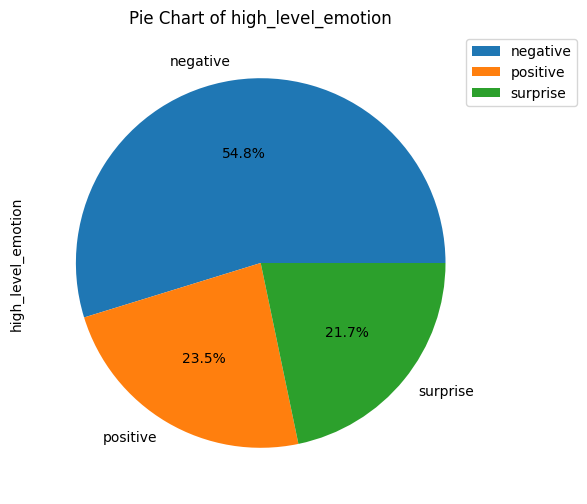

In [16]:
# Pie chart of cellTypeName

train_data['high_level_emotion'].value_counts().plot(kind='pie',figsize=(15, 6),autopct='%1.1f%%')
plt.title("Pie Chart of high_level_emotion")
plt.legend(bbox_to_anchor=(1.2, 1), loc='upper right')
plt.show()

[Text(0.5, 1.0, 'Count PLot of high_level_emotion')]

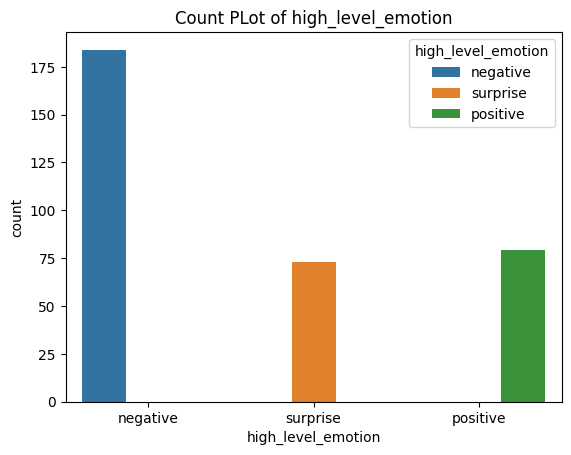

In [17]:
#Count PLot of high_level_emotion
sns.countplot(x="high_level_emotion",data=train_data,hue="high_level_emotion").set(title="Count PLot of high_level_emotion")

In [18]:
train_data['high_level_emotion'].value_counts()

negative    184
positive     79
surprise     73
Name: high_level_emotion, dtype: int64

The data in the "high_level_emotion" column is imbalanced, with varying counts for different emotion categories. Specifically, the "negative" category has 184 instances, the "positive" category has 79 instances, and the "surprise" category has 73 instances. This imbalance could potentially affect the performance of certain machine learning models, as they might become more biased toward the more frequent categories during training. It's important to address this imbalance to ensure fair and accurate model predictions across all emotion categories.

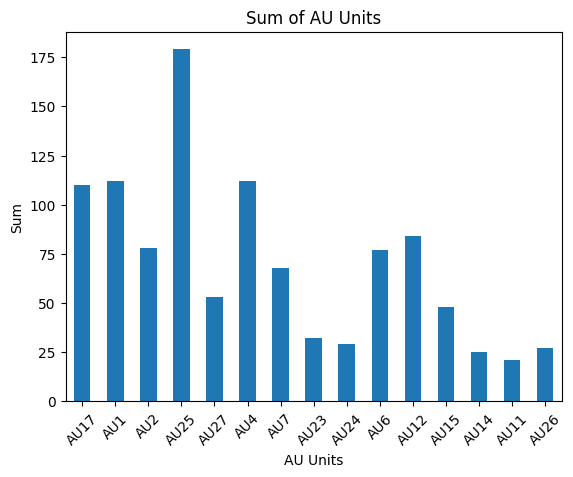

In [19]:
#To show AU code
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the data
columns_to_visualize = ["AU17", "AU1", "AU2", "AU25", "AU27", "AU4", "AU7", "AU23", "AU24", "AU6", "AU12", "AU15", "AU14", "AU11", "AU26"]

# Subset the DataFrame to include only the selected columns
subset_df = train_data[columns_to_visualize]

# Plot a bar plot
subset_df.sum().plot(kind='bar')
plt.xlabel('AU Units')
plt.ylabel('Sum')
plt.title('Sum of AU Units')
plt.xticks(rotation=45)
plt.show()


### Bivariate Data Analysis

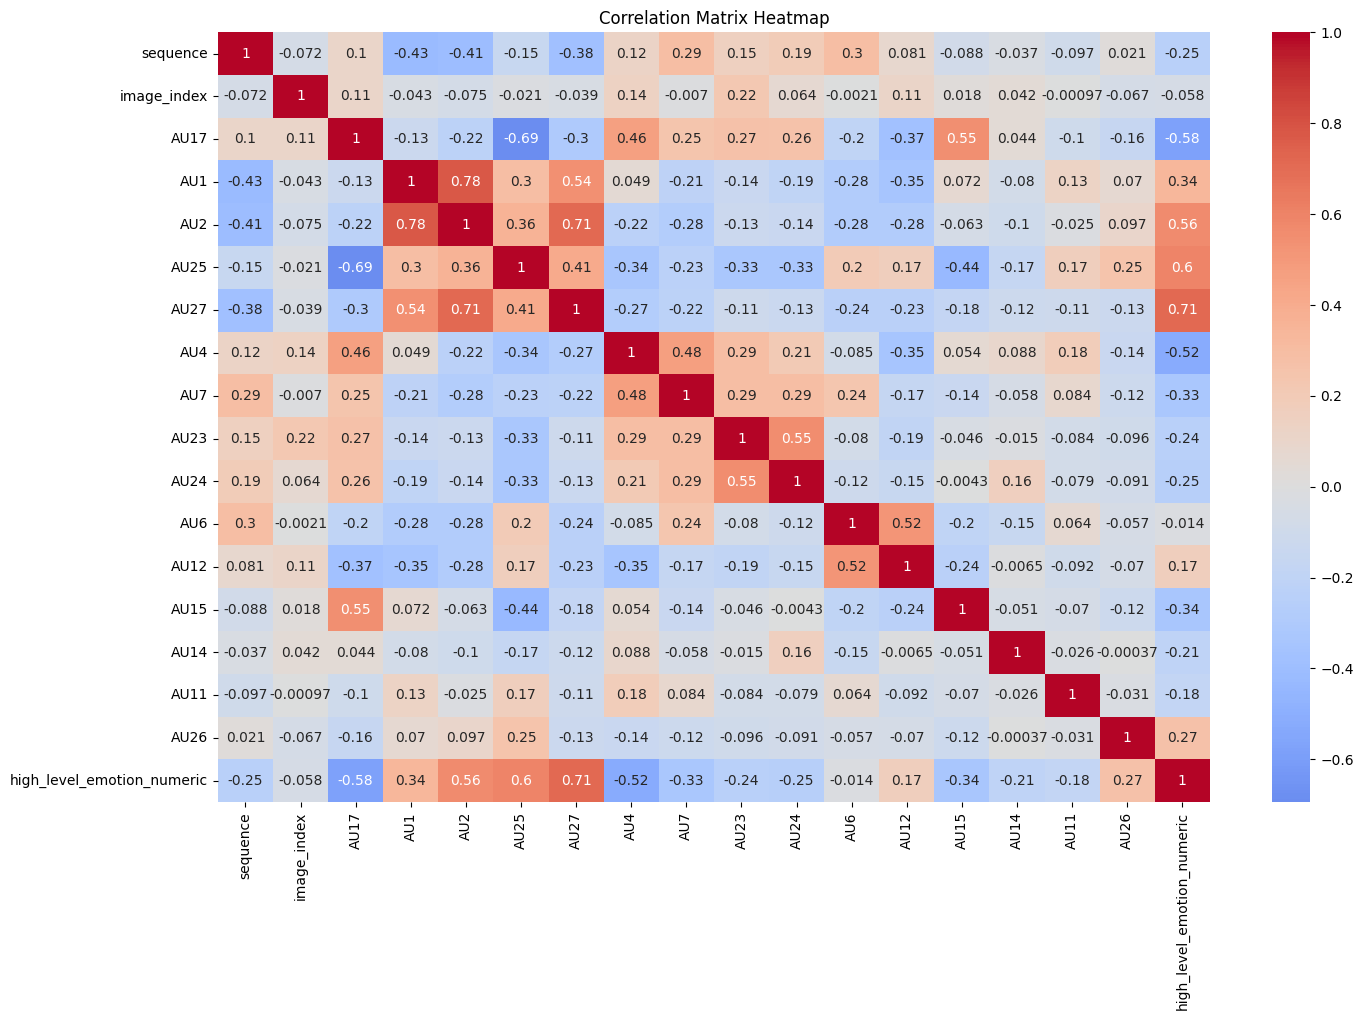

In [20]:
#Heat Map Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Select only the numeric columns from the DataFrame
numeric_columns = train_data.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()


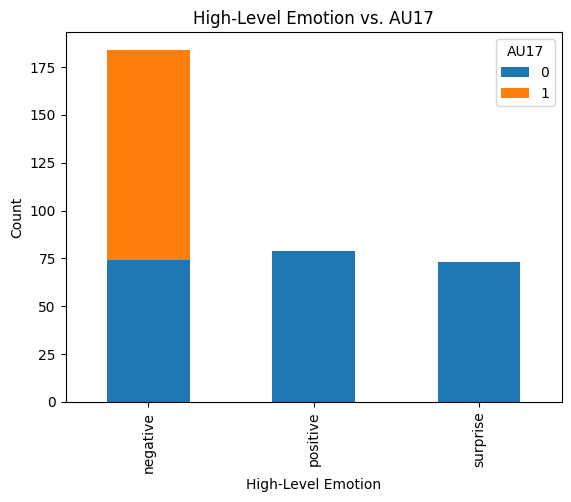

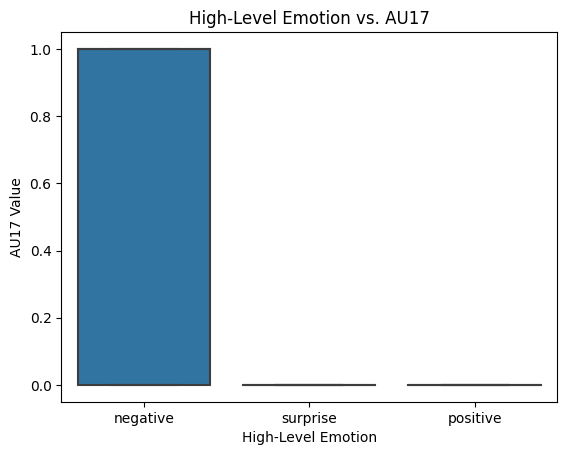

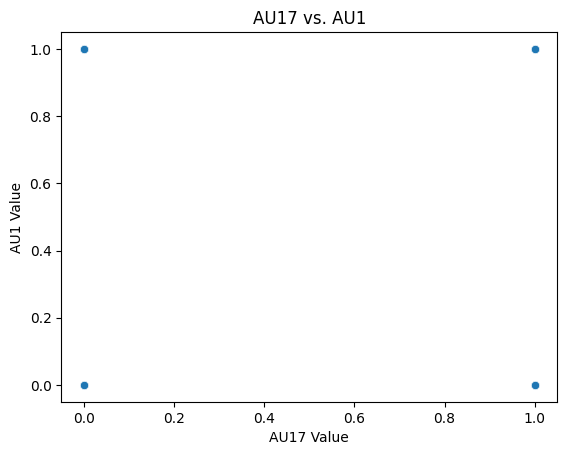

Pearson's correlation coefficient: -0.13005661246432604


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = train_data

# Categorical vs. Categorical: Grouped Bar Chart
cross_tab = pd.crosstab(data['high_level_emotion'], data['AU17'])
cross_tab.plot(kind='bar', stacked=True)
plt.title('High-Level Emotion vs. AU17')
plt.xlabel('High-Level Emotion')
plt.ylabel('Count')
plt.show()

# Categorical vs. Numeric: Box Plot
sns.boxplot(x='high_level_emotion', y='AU17', data=data)
plt.title('High-Level Emotion vs. AU17')
plt.xlabel('High-Level Emotion')
plt.ylabel('AU17 Value')
plt.show()

# Numeric vs. Numeric: Scatter Plot with Correlation
sns.scatterplot(x='AU17', y='AU1', data=data)
plt.title('AU17 vs. AU1')
plt.xlabel('AU17 Value')
plt.ylabel('AU1 Value')
plt.show()

# Calculate Pearson's correlation coefficient
correlation = data['AU17'].corr(data['AU1'])
print(f"Pearson's correlation coefficient: {correlation}")

#Dividing into x attribute and y target

In [22]:
attribute_train = train_data['filepath']
target_train_emotion = train_data["high_level_emotion"]
target_train_AUcode = train_data[["AU17", "AU1", "AU2", "AU25", "AU27", "AU4", "AU7", "AU23", "AU24", "AU6", "AU12", "AU15", "AU14", "AU11", "AU26"]]
print(attribute_train)
print(target_train_emotion)
print(target_train_AUcode)

34     ./cohn-kanade-images/S032/003/S032_003_0000001...
159    ./cohn-kanade-images/S068/004/S068_004_0000001...
278    ./cohn-kanade-images/S094/003/S094_003_0000001...
504    ./cohn-kanade-images/S135/001/S135_001_0000003...
60     ./cohn-kanade-images/S042/006/S042_006_0000001...
                             ...                        
23     ./cohn-kanade-images/S022/006/S022_006_0000001...
133    ./cohn-kanade-images/S062/005/S062_005_0000002...
300    ./cohn-kanade-images/S099/004/S099_004_0000001...
372    ./cohn-kanade-images/S111/006/S111_006_0000001...
94     ./cohn-kanade-images/S054/001/S054_001_0000002...
Name: filepath, Length: 336, dtype: object
34     negative
159    negative
278    negative
504    surprise
60     positive
         ...   
23     negative
133    negative
300    positive
372    negative
94     positive
Name: high_level_emotion, Length: 336, dtype: object
     AU17  AU1  AU2  AU25  AU27  AU4  AU7  AU23  AU24  AU6  AU12  AU15  AU14  \
34      1    0    0  

In [23]:
attribute_train=attribute_train.reset_index()
target_train_emotion=target_train_emotion.reset_index()
target_train_AUcode=target_train_AUcode.reset_index()

#Observing Data

In [24]:
attribute_train.shape

(336, 2)

In [25]:
img=plt.imread(attribute_train["filepath"][0])
img.shape

(490, 640)

In [26]:
import cv2

image = cv2.imread(train_data['filepath'][34])
height, width, channels = image.shape
if channels == 3:
    print("RGB Color Image")
    print(image.shape)


RGB Color Image
(490, 640, 3)


In [27]:
red = image[:, :, 0]
green = image[:, :, 1]
blue = image[:, :, 2]

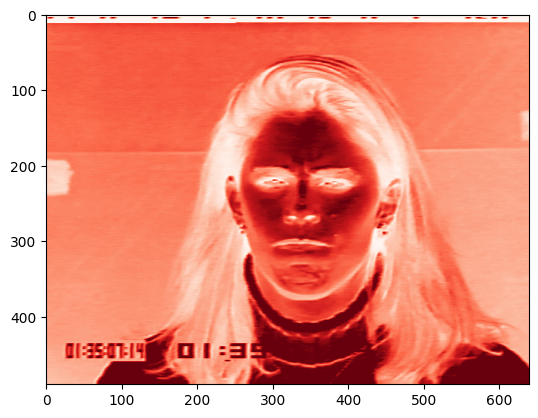

In [28]:
plt.imshow(red, cmap="Reds")
plt.show()

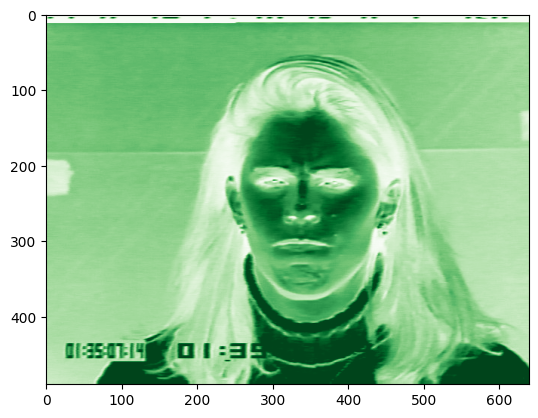

In [29]:
plt.imshow(green, cmap="Greens")
plt.show()

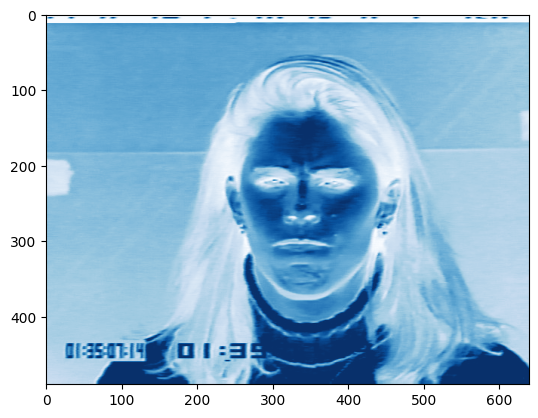

In [30]:
plt.imshow(blue, cmap="Blues")
plt.show()

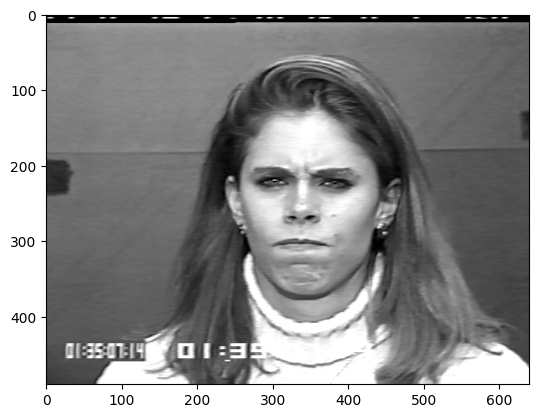

In [31]:
plt.imshow(img, cmap='gray')
plt.show()

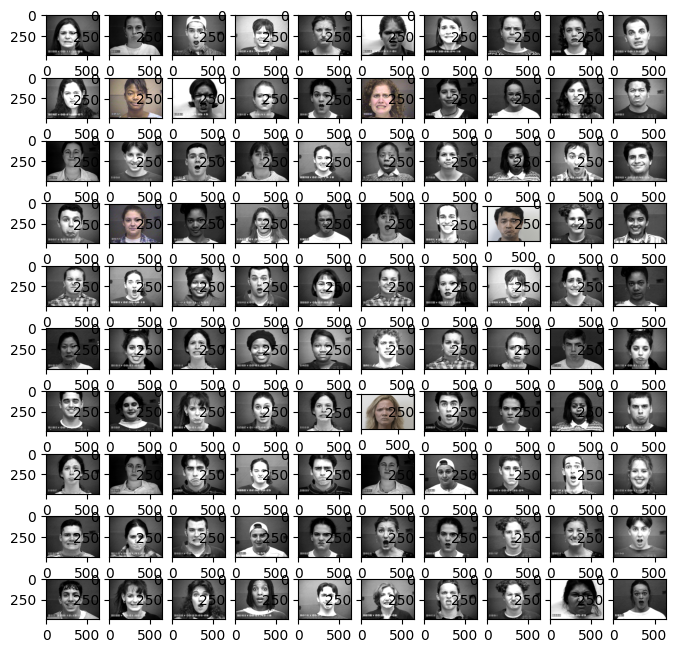

In [32]:
%matplotlib inline

columns = 10
rows = 10

fig=plt.figure(figsize=(8, 8))

for i in range(1, columns*rows + 1):
    img=plt.imread(attribute_train["filepath"][i])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')

plt.show()

#Data Generation

This code defines a custom data generator class for TensorFlow's Keras framework, tailored to process image data for training neural networks. The generator is designed to handle image classification tasks with dual outputs: one for predicting high-level emotions and another for predicting action unit codes. It takes input from a provided pandas DataFrame, where images are associated with corresponding emotion and action unit labels. The generator organizes data into batches, applies optional data augmentation techniques like rotation and shifting, and normalizes pixel values. During each epoch, the generator shuffles data indices for training variety. This custom generator facilitates efficient feeding of data to a neural network model, allowing it to learn from the diverse dataset effectively.


1.   y_high_level:
This represents the labels for high-level emotions. It's a one-dimensional array containing integers that indicate the category or class of the corresponding input images with respect to high-level emotions.
2.  y_au_code:
This stands for the labels associated with the action unit codes. It's a two-dimensional array where each row corresponds to an input image, and the columns represent binary values indicating the presence or absence of specific action units.



{"output_high_level": y_high_level, "output_au_code": y_au_code}:
This part appears in the generator's __getitem__ method where the outputs are returned as a dictionary. It includes two keys, "output_high_level" and "output_au_code," which are associated with the high-level emotion labels and the action unit code labels respectively. These outputs will be used during model training to compare the model's predictions to the actual labels and compute the loss for each of these tasks.

In [33]:
import tensorflow.keras as keras
from scipy.interpolate import interp1d
import numpy as np
from scipy.ndimage.interpolation import rotate, shift
from PIL import Image

class DataGenerator(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, data_frame, batch_size=8, dim=(32, 32, 3), n_classes_high_level=3, n_classes_au_code=15, data_mean=0, data_std=1, data_prefix='', shuffle=True, Augment=True):
        'Initialization'
        self.dim = dim  # Dimensions of the input
        self.batch_size = batch_size
        self.n_classes_high_level = n_classes_high_level  # Number of classes for high-level emotion
        self.n_classes_au_code = n_classes_au_code  # Number of classes for new labels

        self.shuffle = shuffle  # Flag to shuffle data at the end of epoch
        self.Augment = Augment  # Flag to augment the data

        # The data is input as a pandas dataframe, we need to read the relevant fields
        self.data_frame = data_frame
        self.image_labels_high_level = data_frame["high_level_emotion_numeric"].values.tolist()
        self.image_labels_new = data_frame[["AU17", "AU1", "AU2", "AU25", "AU27", "AU4", "AU7", "AU23", "AU24", "AU6", "AU12", "AU15", "AU14", "AU11", "AU26"]].values.tolist()
        self.image_ids = np.arange(len(self.image_labels_high_level)).tolist()
        self.data_prefix = data_prefix

        # Data normalization parameters
        self.data_mean = data_mean
        self.data_std = data_std

        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.image_ids) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data for the given index'
        # Generate indexes of the batch
        indexes = self.indexes[index * self.batch_size : (index + 1) * self.batch_size]

        # Find list of IDs
        data_ids_temp = [self.image_ids[k] for k in indexes]
        image_labels_high_level_temp = [self.image_labels_high_level[k] for k in indexes]
        image_labels_au_code = [self.image_labels_new[k] for k in indexes]

        # Generate data
        X, y_high_level, y_au_code = self.__data_generation(data_ids_temp, image_labels_high_level_temp, image_labels_au_code)

        return X, {"output_high_level": y_high_level, "output_au_code": y_au_code}

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.image_ids))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    # Support function
    def __data_generation(self, data_ids_temp, image_labels_high_level_temp, image_labels_au_code):
        'Generates data containing batch_size samples'

        # Initialization
        X = np.empty((self.batch_size, *self.dim))
        y_high_level = np.empty((self.batch_size), dtype=int)
        y_au_code = np.empty((self.batch_size, self.n_classes_au_code), dtype=int)

        # Generate data
        for i, ids in enumerate(data_ids_temp):
            X[i,] = self.__read_data_instance(data_ids_temp[i])
            y_high_level[i] = image_labels_high_level_temp[i]
            y_au_code[i] = image_labels_au_code[i]

        return X, keras.utils.to_categorical(y_high_level, num_classes=self.n_classes_high_level), y_au_code

    def __read_data_instance(self, pid):
        # Read an image
        filepath = self.data_prefix + self.data_frame.iloc[pid]['filepath']

        data = Image.open(filepath).convert('L')
        data = data.resize((32, 32))
        data = np.asarray(data)
        data = np.expand_dims(data, axis=-1)

        if self.Augment:
            rot = np.random.rand(1) < 0.5
            if rot:
                rot = np.random.randint(-10, 10, size=1)
                data = rotate(data, angle=rot[0], reshape=False)

            shift_val = np.random.randint(-5, high=5, size=2, dtype=int).tolist() + [0,]
            data = shift(data, shift_val, order=0, mode='constant', cval=0.0, prefilter=False)

        X = data

        # Input normalization
        X = (X - self.data_mean) / self.data_std
        return X


<ipython-input-33-296cef35bb93>:4: DeprecationWarning: Please use `rotate` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import rotate, shift
<ipython-input-33-296cef35bb93>:4: DeprecationWarning: Please use `shift` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import rotate, shift


In [34]:
data_mean = 0.
data_std = 255.0
prefix=''
training_generator = DataGenerator(train_data, batch_size=32, data_mean=data_mean, data_std=data_std, n_classes_high_level=3,n_classes_au_code=15, Augment=False, data_prefix=prefix,shuffle=False)
validation_generator = DataGenerator(val_data, batch_size=32, data_mean=data_mean, data_std=data_std, n_classes_high_level=3,n_classes_au_code=15, Augment=False, data_prefix=prefix,shuffle=True)
testing_generator = DataGenerator(test_data, batch_size=32, data_mean=data_mean, data_std=data_std, n_classes_high_level=3,n_classes_au_code=15, Augment=False, data_prefix=prefix,shuffle=False)
nEpochs = 250



1.   training_generator:
This instance is responsible for generating batches of data for training the neural network. It uses the train_data DataFrame and is configured with a batch size of 32, normalization parameters (data_mean and data_std), number of classes for high-level emotions (n_classes_high_level), number of classes for action unit codes (n_classes_au_code), no data augmentation (Augment=False), a specific data prefix (data_prefix=prefix), and data shuffling turned off (shuffle=False). The shuffling of training data is disabled to ensure consistency and reproducibility during training.
2.   validation_generator:
This instance generates batches of data for validating the neural network's performance. It uses the val_data DataFrame and shares the same configurations as the training_generator, except for data shuffling, which is turned on (shuffle=True). Shuffling the validation data helps prevent the model from memorizing the order of validation samples and provides a more effective assessment of the model's generalization capability.
3.  testing_generator:
Similar to the validation generator, this instance produces batches of data for testing the trained model's performance. It utilizes the test_data DataFrame and retains the same configuration settings, including no shuffling (shuffle=False). Similar to validation, not shuffling the testing data ensures consistent evaluation and comparison of model performance.





In [35]:
print(training_generator.__len__())
for x,y1, in training_generator.__iter__():
  print(x.shape, y1)

10
(32, 32, 32, 3) {'output_high_level': array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32), 'output_au_code': array([[1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1

In [36]:
# Function to show accuracy of Traing, Testing and Validation
def accuracy(model,history):
  # Evaluate the model on Training data

  print("Training Loss for High-Level Emotion:", history.history['output_high_level_loss'][-1])
  print("Training Loss for AU Code Emotion:", history.history['output_au_code_loss'][-1])
  print("Training High-Level Emotion Accuracy:", history.history['output_high_level_accuracy'][-1])
  print("Training AU Code Accuracy:", history.history['output_au_code_accuracy'][-1])
  # Evaluate the model on validation data

  evaluation = model.evaluate(validation_generator)
  print("Validation Loss for High-Level Emotion:", history.history['val_output_high_level_loss'][-1])
  print("Validation Loss for AU Code Emotion:", history.history['val_output_au_code_loss'][-1])
  print("Validation High-Level Emotion Accuracy:", history.history['val_output_high_level_accuracy'][-1])
  print("Validation AU Code Accuracy:", history.history['val_output_au_code_accuracy'][-1])

  # Evaluate the model on testing data
  evaluation = model.evaluate(testing_generator)
  print("Testing Loss for High-Level Emotion:", evaluation[1])
  print("Testing Loss for AU Code Emotion:", evaluation[2])
  print("Testing High-Level Emotion Accuracy:", evaluation[3])
  print("Testing AU Code Accuracy:", evaluation[4])

In [37]:
def plot_learning_curve(train_loss, val_loss, train_metric, val_metric, metric_name='Accuracy'):
    plt.figure(figsize=(10,5))

    plt.subplot(1,2,1)
    plt.plot(train_loss, 'r--')
    plt.plot(val_loss, 'b--')
    plt.xlabel("epochs")
    plt.ylabel("Loss")
    plt.legend(['train', 'val'], loc='upper left')

    plt.subplot(1,2,2)
    plt.plot(train_metric, 'r--')
    plt.plot(val_metric, 'b--')
    plt.xlabel("epochs")
    plt.ylabel(metric_name)
    plt.legend(['train', 'val'], loc='upper left')

    plt.show()

In [38]:
#Function to plot graph
def graph_plot(history):
  print("High Level Emotion")
  plot_learning_curve(history.history['output_high_level_loss'], history.history['val_output_high_level_loss'],
                    history.history['output_high_level_accuracy'], history.history['val_output_high_level_accuracy'],
                    metric_name='Accuracy')
  print("-------------------------------------------------------------------------------------------------------")
  print("AU Code")
  plot_learning_curve(history.history['output_au_code_loss'], history.history['val_output_au_code_loss'],
                    history.history['output_au_code_accuracy'], history.history['val_output_au_code_accuracy'],
                    metric_name='Accuracy')

In [39]:
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt
def confusion_matrix_function(y_true_high_level, y_pred_high_level,y_true_au_code, y_pred_au_code):

  # Calculate confusion matrices
  cm_high_level = multilabel_confusion_matrix(y_true_high_level, y_pred_high_level)
  cm_au_code = multilabel_confusion_matrix(y_true_au_code, y_pred_au_code)

  # Plot confusion matrix for output_high_level
  plt.figure()
  plt.imshow(cm_high_level[0], interpolation='nearest', cmap=plt.cm.Blues)
  plt.title("Confusion Matrix (High Level Emotion)")
  plt.colorbar()
  plt.xticks(np.arange(2), ['0', '1'])
  plt.yticks(np.arange(2), ['0', '1'])
  thresh = cm_high_level[0].max() / 2
  for i in range(2):
      for j in range(2):
          plt.text(j, i, f'{cm_high_level[0][i, j]}', ha='center', va='center',
                  color='white' if cm_high_level[0][i, j] > thresh else 'black')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

  # Plot confusion matrix for output_au_code
  plt.figure()
  plt.imshow(cm_au_code[0], interpolation='nearest', cmap=plt.cm.Blues)
  plt.title("Confusion Matrix (AU Code)")
  plt.colorbar()
  plt.xticks(np.arange(2), ['0', '1'])
  plt.yticks(np.arange(2), ['0', '1'])
  thresh = cm_au_code[0].max() / 2
  for i in range(2):
      for j in range(2):
          plt.text(j, i, f'{cm_au_code[0][i, j]}', ha='center', va='center',
                  color='white' if cm_au_code[0][i, j] > thresh else 'black')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

In [40]:
from sklearn.metrics import f1_score

def f1_score_function(y_true_high_level, y_pred_high_level,y_true_au_code, y_pred_au_code):


  # Calculate F1 scores
  f1_scores_high_level = f1_score(y_true_high_level, y_pred_high_level , average='micro')
  f1_scores_au_code = f1_score(y_true_au_code, (y_pred_au_code > 0.4).astype(int), average='micro')

  print("F1 Score (High Level Emotion):", f1_scores_high_level)
  print("F1 Score (AU Code):", f1_scores_au_code)

#Base Line Model

## Mobile Net

In [41]:
import tensorflow as tf
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2

# Define the input shape for your images
input_shape = (32, 32, 3)  # Adjust dimensions based on your data

# Load the pre-trained MobileNetV2 model (excluding top classification layers)
base_model = MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False
num_classes_high_level=3
num_classes_au_code=15
# Custom classification head
custom_segment = GlobalAveragePooling2D()(base_model.output)
custom_segment = Dense(128, activation='relu')(custom_segment)
output_high_level = Dense(num_classes_high_level, activation='softmax', name='output_high_level')(custom_segment)
output_au_code = Dense(num_classes_au_code, activation='sigmoid', name='output_au_code')(custom_segment)


# Combine base model and custom segment
model = Model(inputs=base_model.input, outputs=[output_high_level, output_au_code])

# Compile the model
model.compile(optimizer='adam', loss={'output_high_level': 'categorical_crossentropy', 'output_au_code': 'binary_crossentropy'},metrics={'output_high_level': 'accuracy', 'output_au_code': 'accuracy'})

# Print model summary
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 16, 16, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 16, 16, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 16, 16, 32)   0           ['bn_Conv1[0][0]']               
                                                                                              

In [42]:
# Train the model
history=model.fit(training_generator, epochs=25, validation_data=validation_generator)

Epoch 1/25
10/10 [==============================] - 9s 441ms/step - loss: 1.7483 - output_high_level_loss: 1.0860 - output_au_code_loss: 0.6623 - output_high_level_accuracy: 0.4531 - output_au_code_accuracy: 0.0437 - val_loss: 1.6541 - val_output_high_level_loss: 1.0080 - val_output_au_code_loss: 0.6462 - val_output_high_level_accuracy: 0.5938 - val_output_au_code_accuracy: 0.2083
Epoch 2/25
10/10 [==============================] - 3s 324ms/step - loss: 1.6629 - output_high_level_loss: 1.0355 - output_au_code_loss: 0.6274 - output_high_level_accuracy: 0.5375 - output_au_code_accuracy: 0.1656 - val_loss: 1.6383 - val_output_high_level_loss: 1.0207 - val_output_au_code_loss: 0.6175 - val_output_high_level_accuracy: 0.5938 - val_output_au_code_accuracy: 0.3854
Epoch 3/25
10/10 [==============================] - 3s 326ms/step - loss: 1.6076 - output_high_level_loss: 1.0137 - output_au_code_loss: 0.5939 - output_high_level_accuracy: 0.5375 - output_au_code_accuracy: 0.2812 - val_loss: 1.582

In [43]:
#To find accuarcy of Training, Testing and Validation
accuracy(model,history)

Training Loss for High-Level Emotion: 0.7685369253158569
Training Loss for AU Code Emotion: 0.4458138942718506
Training High-Level Emotion Accuracy: 0.675000011920929
Training AU Code Accuracy: 0.3125
3/3 [==============================] - 1s 238ms/step - loss: 1.6292 - output_high_level_loss: 1.1520 - output_au_code_loss: 0.4772 - output_high_level_accuracy: 0.5208 - output_au_code_accuracy: 0.3438
Validation Loss for High-Level Emotion: 1.155264139175415
Validation Loss for AU Code Emotion: 0.4746437966823578
Validation High-Level Emotion Accuracy: 0.5104166865348816
Validation AU Code Accuracy: 0.3333333432674408
3/3 [==============================] - 1s 262ms/step - loss: 1.4551 - output_high_level_loss: 0.9541 - output_au_code_loss: 0.5010 - output_high_level_accuracy: 0.5417 - output_au_code_accuracy: 0.2396
Testing Loss for High-Level Emotion: 0.9541282057762146
Testing Loss for AU Code Emotion: 0.5009837746620178
Testing High-Level Emotion Accuracy: 0.5416666865348816
Testing A

High Level Emotion


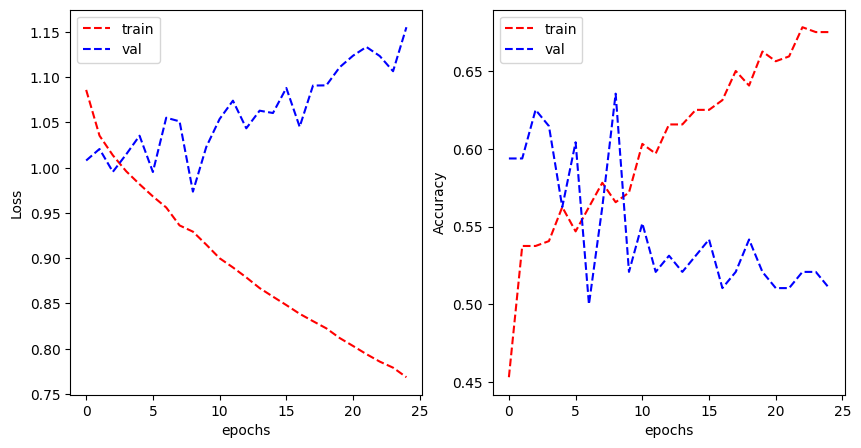

-------------------------------------------------------------------------------------------------------
AU Code


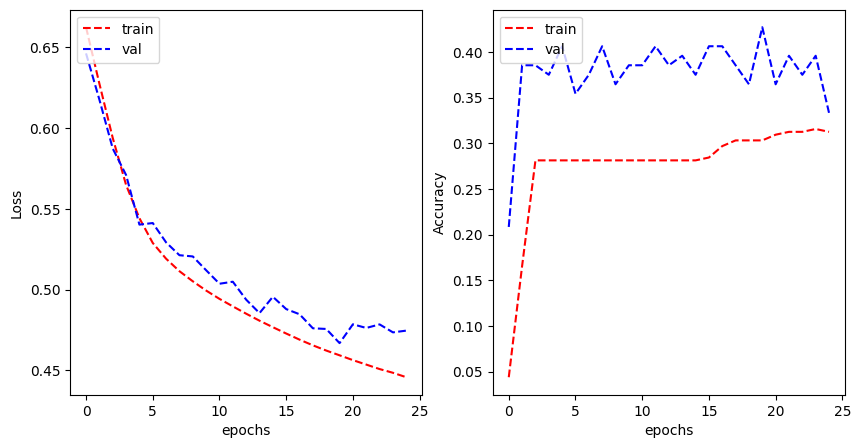

In [44]:
#To plot the Graph
graph_plot(history)

In [45]:
# Generate predictions using the trained model
y_pred = model.predict(testing_generator)
# Flatten the predictions and ground truth labels
y_pred_high_level = y_pred[0].argmax(axis=1)
y_true_high_level = testing_generator.image_labels_high_level[0:96]
y_pred_au_code = y_pred[1]
y_pred_au_code=(y_pred_au_code > 0.4).astype(int)
y_true_au_code = testing_generator.image_labels_new[0:96]

3/3 [==============================] - 2s 259ms/step


In [46]:
f1_score_function(y_true_high_level, y_pred_high_level,y_true_au_code, y_pred_au_code)

F1 Score (High Level Emotion): 0.5416666666666666
F1 Score (AU Code): 0.31477927063339733


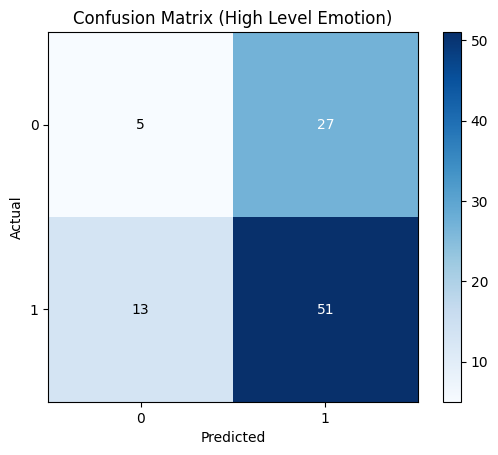

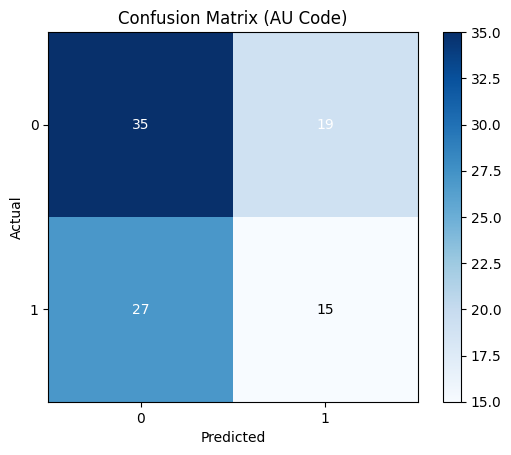

In [47]:
confusion_matrix_function(y_true_high_level, y_pred_high_level,y_true_au_code, y_pred_au_code)

#Vgg 16

In [48]:
import tensorflow as tf
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16

# Define the input shape for your images
input_shape = (224, 224, 3)  # Adjust dimensions based on your data

# Load the pre-trained VGG16 model (excluding top classification layers)
base_model = VGG16(input_shape=input_shape, include_top=False, weights='imagenet')

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Custom classification head
custom_segment = GlobalAveragePooling2D()(base_model.output)
custom_segment = Dense(128, activation='relu')(custom_segment)
output_high_level = Dense(num_classes_high_level, activation='softmax', name='output_high_level')(custom_segment)
output_au_code = Dense(num_classes_au_code, activation='sigmoid', name='output_au_code')(custom_segment)

# Combine base model and custom segment
model = Model(inputs=base_model.input, outputs=[output_high_level, output_au_code])

# Compile the model
model.compile(optimizer='adam', loss={'output_high_level': 'categorical_crossentropy', 'output_au_code': 'binary_crossentropy'},metrics={'output_high_level': 'accuracy', 'output_au_code': 'accuracy'})

# Print model summary
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 224, 224, 64  1792        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv2 (Conv2D)          (None, 224, 224, 64  36928       ['block1_conv1[0][0]']           
                                )                                                           

In [49]:
# Train the model
history=model.fit(training_generator, epochs=25, validation_data=validation_generator)

Epoch 1/25
10/10 [==============================] - 6s 397ms/step - loss: 1.6289 - output_high_level_loss: 1.0222 - output_au_code_loss: 0.6068 - output_high_level_accuracy: 0.5125 - output_au_code_accuracy: 0.1187 - val_loss: 1.4671 - val_output_high_level_loss: 0.9301 - val_output_au_code_loss: 0.5370 - val_output_high_level_accuracy: 0.5938 - val_output_au_code_accuracy: 0.0833
Epoch 2/25
10/10 [==============================] - 3s 344ms/step - loss: 1.4629 - output_high_level_loss: 0.9579 - output_au_code_loss: 0.5050 - output_high_level_accuracy: 0.5594 - output_au_code_accuracy: 0.2531 - val_loss: 1.4570 - val_output_high_level_loss: 0.9836 - val_output_au_code_loss: 0.4734 - val_output_high_level_accuracy: 0.5938 - val_output_au_code_accuracy: 0.4062
Epoch 3/25
10/10 [==============================] - 3s 329ms/step - loss: 1.4384 - output_high_level_loss: 0.9649 - output_au_code_loss: 0.4735 - output_high_level_accuracy: 0.5281 - output_au_code_accuracy: 0.2812 - val_loss: 1.411

In [50]:
#To find accuarcy of Training, Testing and Validation
accuracy(model,history)

Training Loss for High-Level Emotion: 0.6483477354049683
Training Loss for AU Code Emotion: 0.41115322709083557
Training High-Level Emotion Accuracy: 0.737500011920929
Training AU Code Accuracy: 0.34062498807907104
3/3 [==============================] - 1s 246ms/step - loss: 1.5634 - output_high_level_loss: 1.1062 - output_au_code_loss: 0.4572 - output_high_level_accuracy: 0.5104 - output_au_code_accuracy: 0.3958
Validation Loss for High-Level Emotion: 1.1318565607070923
Validation Loss for AU Code Emotion: 0.46115174889564514
Validation High-Level Emotion Accuracy: 0.5
Validation AU Code Accuracy: 0.375
3/3 [==============================] - 1s 243ms/step - loss: 1.4397 - output_high_level_loss: 0.9494 - output_au_code_loss: 0.4903 - output_high_level_accuracy: 0.5938 - output_au_code_accuracy: 0.2396
Testing Loss for High-Level Emotion: 0.9494449496269226
Testing Loss for AU Code Emotion: 0.49027514457702637
Testing High-Level Emotion Accuracy: 0.59375
Testing AU Code Accuracy: 0.239

High Level Emotion


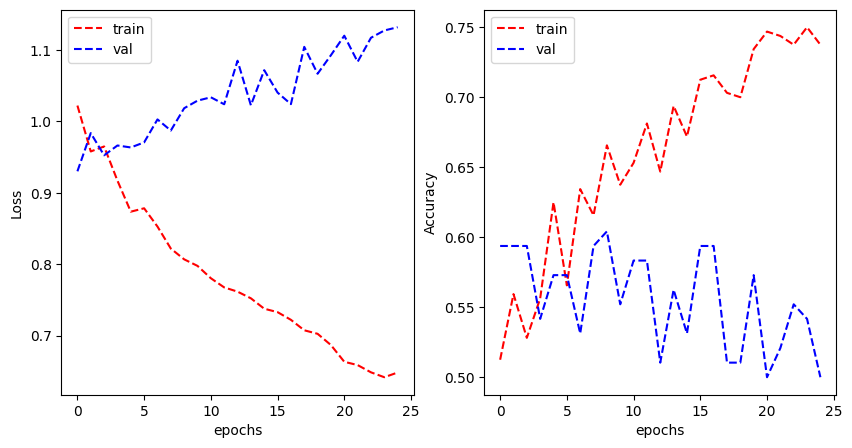

-------------------------------------------------------------------------------------------------------
AU Code


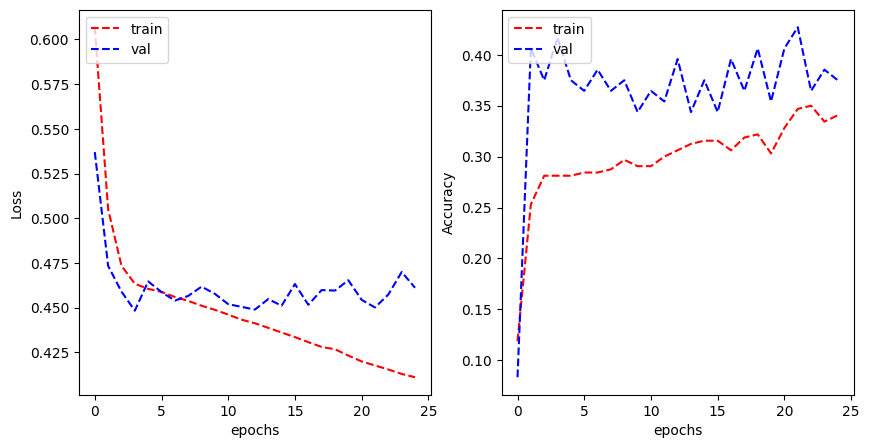

In [51]:
#To plot the Graph
graph_plot(history)

In [52]:
# Generate predictions using the trained model
y_pred = model.predict(testing_generator)
# Flatten the predictions and ground truth labels
y_pred_high_level = y_pred[0].argmax(axis=1)
y_true_high_level = testing_generator.image_labels_high_level[0:96]
y_pred_au_code = y_pred[1]
y_pred_au_code=(y_pred_au_code > 0.4).astype(int)
y_true_au_code = testing_generator.image_labels_new[0:96]

3/3 [==============================] - 1s 251ms/step


In [53]:
f1_score_function(y_true_high_level, y_pred_high_level,y_true_au_code, y_pred_au_code)

F1 Score (High Level Emotion): 0.59375
F1 Score (AU Code): 0.3101391650099403


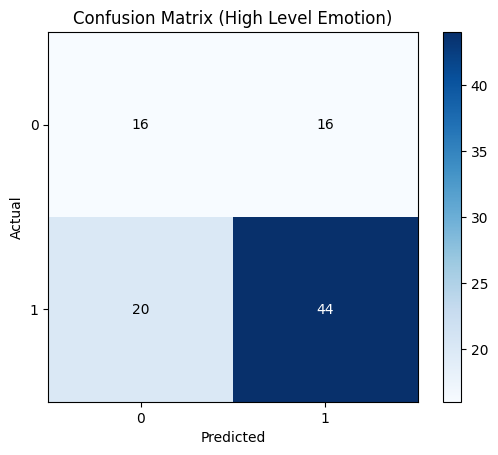

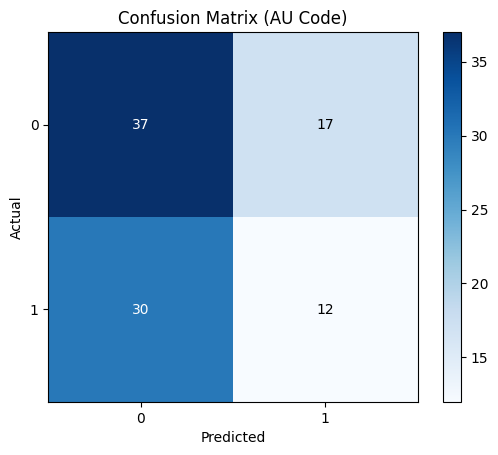

In [54]:
confusion_matrix_function(y_true_high_level, y_pred_high_level,y_true_au_code, y_pred_au_code)

#Resenet 50

In [55]:
class ResidualBlock(tf.keras.layers.Layer):

    # Initialize components of the model
    def __init__(self, filter_num, stride=1, reg_lambda=0.0):
        super(ResidualBlock, self).__init__()
        self.conv1 = tf.keras.layers.Conv2D(filters=filter_num,
                                            kernel_size=(3, 3),
                                            strides=stride,
                                            kernel_initializer="he_normal",
                                            kernel_regularizer=tf.keras.regularizers.l2(reg_lambda),
                                            padding="same")
        self.bn1 = tf.keras.layers.BatchNormalization(momentum=.4)
        self.conv2 = tf.keras.layers.Conv2D(filters=filter_num,
                                            kernel_size=(3, 3),
                                            strides=1,
                                            kernel_initializer="he_normal",
                                            kernel_regularizer=tf.keras.regularizers.l2(reg_lambda),
                                            padding="same")
        self.bn2 = tf.keras.layers.BatchNormalization(momentum=.4)
        if stride != 1:
            self.downsample = tf.keras.Sequential()
            self.downsample.add(tf.keras.layers.Conv2D(filters=filter_num,
                                                       kernel_size=(1, 1),
                                                       kernel_initializer="he_normal",
                                                       kernel_regularizer=tf.keras.regularizers.l2(reg_lambda),
                                                       strides=stride))
            self.downsample.add(tf.keras.layers.BatchNormalization(momentum=.4))
        else:
            self.downsample = lambda x: x

    # Define the forward function
    def call(self, inputs, training=None, **kwargs):
        residual = self.downsample(inputs)

        x = self.conv1(inputs)
        x = self.bn1(x, training=training)
        x = tf.nn.relu(x)
        x = self.conv2(x)
        x = self.bn2(x, training=training)

        output = tf.nn.relu(tf.keras.layers.add([residual, x]))

        return output

    def get_config(self):

        config = super().get_config().copy()
        config.update({
            'conv1': self.conv1,
            'bn1': self.bn1,
            'conv2': self.conv2,
            'bn2': self.bn2,
            'downsample': self.downsample,
        })
        return config

In [56]:
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
def create_combined_model(input_shape, num_classes_high_level, num_classes_au_code,regularisation_value):
    # Input layer
    input_layer = Input(shape=input_shape)

    # Initial convolutional layers
    x = tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation="relu", padding="same", kernel_initializer="he_normal", kernel_regularizer=tf.keras.regularizers.l2(regularisation_value))(input_layer)
    x = BatchNormalization(momentum=0.4)(x)

    # Stack of residual blocks
    filters = [64, 128, 256]  # Example filters for the residual blocks
    block_size = [3, 3,3]   # Example number of blocks per stack
    for nFilters, nBlocks in zip(filters, block_size):
        x = ResidualBlock(nFilters, stride=2, reg_lambda=regularisation_value)(x)
        for _ in range(1, nBlocks):
            x = ResidualBlock(nFilters, stride=1, reg_lambda=regularisation_value)(x)

    # Final part
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = Dense(128, activation='relu')(x)

    # Output layers
    output_high_level = Dense(num_classes_high_level, activation='softmax', name='output_high_level')(x)
    output_au_code = Dense(num_classes_au_code, activation='sigmoid', name='output_au_code')(x)

    # Create the model
    model = Model(inputs=input_layer, outputs=[output_high_level, output_au_code])

    return model

# Define input shape and number of classes
input_shape = (32, 32, 3)
num_classes_high_level = 3
num_classes_au_code = 15

# Create the combined model
model = create_combined_model(input_shape, num_classes_high_level, num_classes_au_code,0)

# Compile the model
model.compile(optimizer='adam', loss={'output_high_level': 'categorical_crossentropy', 'output_au_code': 'binary_crossentropy'},
              metrics={'output_high_level': 'accuracy', 'output_au_code': 'accuracy'})

# Print model summary
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 32, 32, 64)   1792        ['input_3[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 32, 32, 64)  256         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 residual_block (ResidualBlock)  (None, 16, 16, 64)  78784       ['batch_normalization[0][0]

In [57]:
# Train the model
history=model.fit(training_generator, epochs=25, validation_data=validation_generator)

Epoch 1/25
10/10 [==============================] - 20s 411ms/step - loss: 1.8267 - output_high_level_loss: 1.1825 - output_au_code_loss: 0.6443 - output_high_level_accuracy: 0.4563 - output_au_code_accuracy: 0.0906 - val_loss: 1.5194 - val_output_high_level_loss: 0.9800 - val_output_au_code_loss: 0.5394 - val_output_high_level_accuracy: 0.6146 - val_output_au_code_accuracy: 0.1354
Epoch 2/25
10/10 [==============================] - 3s 321ms/step - loss: 1.5838 - output_high_level_loss: 1.0530 - output_au_code_loss: 0.5309 - output_high_level_accuracy: 0.4844 - output_au_code_accuracy: 0.1906 - val_loss: 1.5927 - val_output_high_level_loss: 1.1195 - val_output_au_code_loss: 0.4732 - val_output_high_level_accuracy: 0.2708 - val_output_au_code_accuracy: 0.4167
Epoch 3/25
10/10 [==============================] - 3s 326ms/step - loss: 1.3554 - output_high_level_loss: 0.8701 - output_au_code_loss: 0.4852 - output_high_level_accuracy: 0.6156 - output_au_code_accuracy: 0.2500 - val_loss: 1.70

In [58]:
#To find accuarcy of Training, Testing and Validation
accuracy(model,history)

Training Loss for High-Level Emotion: 0.10752800852060318
Training Loss for AU Code Emotion: 0.31871598958969116
Training High-Level Emotion Accuracy: 0.956250011920929
Training AU Code Accuracy: 0.33125001192092896
3/3 [==============================] - 1s 244ms/step - loss: 2.1878 - output_high_level_loss: 1.6986 - output_au_code_loss: 0.4891 - output_high_level_accuracy: 0.5938 - output_au_code_accuracy: 0.3542
Validation Loss for High-Level Emotion: 1.6731609106063843
Validation Loss for AU Code Emotion: 0.4869329035282135
Validation High-Level Emotion Accuracy: 0.6041666865348816
Validation AU Code Accuracy: 0.375
3/3 [==============================] - 1s 243ms/step - loss: 1.7488 - output_high_level_loss: 1.2562 - output_au_code_loss: 0.4926 - output_high_level_accuracy: 0.6979 - output_au_code_accuracy: 0.4167
Testing Loss for High-Level Emotion: 1.2562288045883179
Testing Loss for AU Code Emotion: 0.4925786554813385
Testing High-Level Emotion Accuracy: 0.6979166865348816
Testin

High Level Emotion


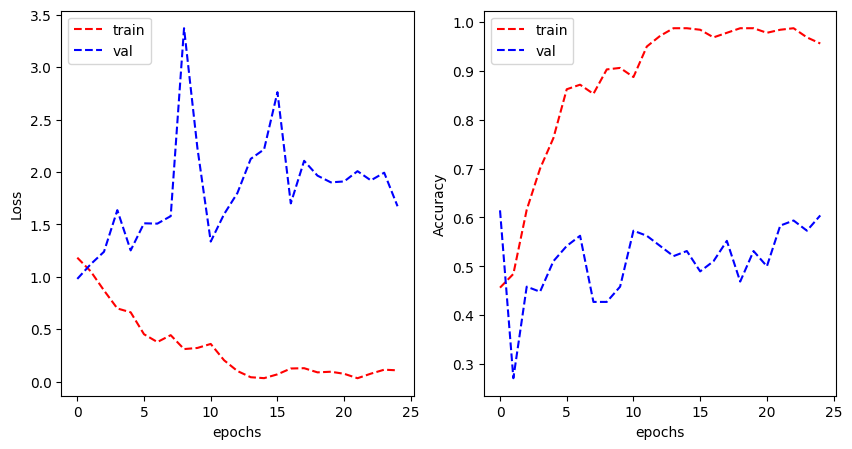

-------------------------------------------------------------------------------------------------------
AU Code


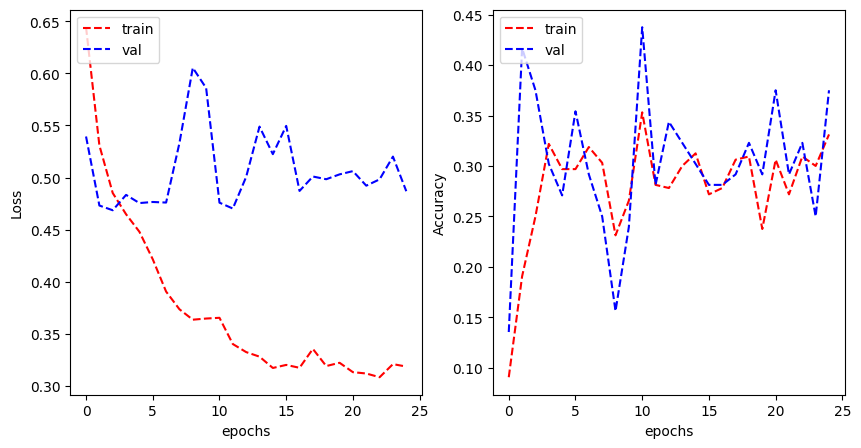

In [59]:
#To plot the Graph
graph_plot(history)

In [60]:
# Generate predictions using the trained model
y_pred = model.predict(testing_generator)
# Flatten the predictions and ground truth labels
y_pred_high_level = y_pred[0].argmax(axis=1)
y_true_high_level = testing_generator.image_labels_high_level[0:96]
y_pred_au_code = y_pred[1]
y_pred_au_code=(y_pred_au_code > 0.4).astype(int)
y_true_au_code = testing_generator.image_labels_new[0:96]

3/3 [==============================] - 1s 246ms/step


In [61]:
f1_score_function(y_true_high_level, y_pred_high_level,y_true_au_code, y_pred_au_code)

F1 Score (High Level Emotion): 0.6979166666666666
F1 Score (AU Code): 0.4086021505376344


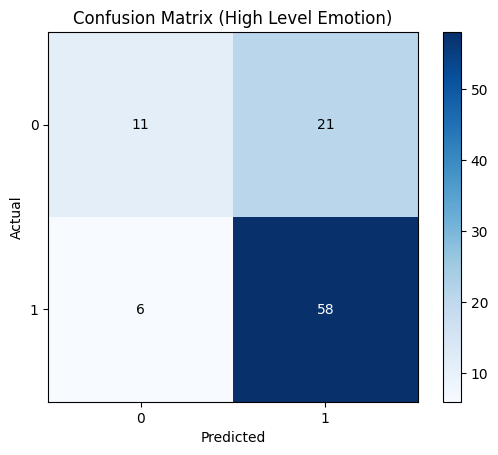

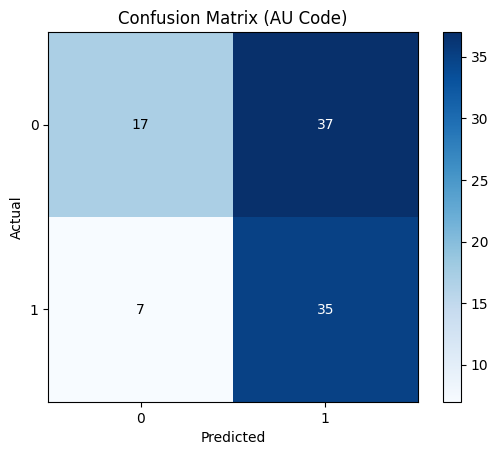

In [62]:
confusion_matrix_function(y_true_high_level, y_pred_high_level,y_true_au_code, y_pred_au_code)

Through a comprehensive comparative analysis of popular models, namely MobileNet, VGG-16, and ResNet, we observed a distinct performance superiority exhibited by the **ResNet model** across multiple crucial metrics. Specifically, the ResNet model showcased remarkable gains in terms of F1 score, testing accuracy, and exhibited a notably lower loss in contrast to its counterparts. These findings underscore ResNet's exceptional capacity to capture intricate features and patterns within the data, ultimately leading to heightened predictive precision. Leveraging this substantial advantage, we have made the strategic decision to proceed with the ResNet model for subsequent phases, including meticulous hyperparameter tuning. This choice is grounded in the model's consistent track record of excellence and the anticipation that further optimization will only amplify its already impressive predictive capabilities.

#Data  Augmentation

In [63]:
import tensorflow.keras as keras
from scipy.interpolate import interp1d
import numpy as np
from scipy.ndimage.interpolation import rotate, shift
from PIL import Image

class DataGenerator(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, data_frame, batch_size=8, dim=(32, 32, 3), n_classes_high_level=3, n_classes_au_code=15, data_mean=0, data_std=1, data_prefix='', shuffle=True, Augment=True):
        'Initialization'
        self.dim = dim  # Dimensions of the input
        self.batch_size = batch_size
        self.n_classes_high_level = n_classes_high_level  # Number of classes for high-level emotion
        self.n_classes_au_code = n_classes_au_code  # Number of classes for new labels

        self.shuffle = shuffle  # Flag to shuffle data at the end of epoch
        self.Augment = Augment  # Flag to augment the data

        # The data is input as a pandas dataframe, we need to read the relevant fields
        self.data_frame = data_frame
        self.image_labels_high_level = data_frame["high_level_emotion_numeric"].values.tolist()
        self.image_labels_new = data_frame[["AU17", "AU1", "AU2", "AU25", "AU27", "AU4", "AU7", "AU23", "AU24", "AU6", "AU12", "AU15", "AU14", "AU11", "AU26"]].values.tolist()
        self.image_ids = np.arange(len(self.image_labels_high_level)).tolist()
        self.data_prefix = data_prefix

        # Data normalization parameters
        self.data_mean = data_mean
        self.data_std = data_std

        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.image_ids) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data for the given index'
        # Generate indexes of the batch
        indexes = self.indexes[index * self.batch_size : (index + 1) * self.batch_size]

        # Find list of IDs
        data_ids_temp = [self.image_ids[k] for k in indexes]
        image_labels_high_level_temp = [self.image_labels_high_level[k] for k in indexes]
        image_labels_au_code = [self.image_labels_new[k] for k in indexes]

        # Generate data
        X, y_high_level, y_au_code = self.__data_generation(data_ids_temp, image_labels_high_level_temp, image_labels_au_code)

        return X, {"output_high_level": y_high_level, "output_au_code": y_au_code}

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.image_ids))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    # Support function
    def __data_generation(self, data_ids_temp, image_labels_high_level_temp, image_labels_au_code):
        'Generates data containing batch_size samples'

        # Initialization
        X = np.empty((self.batch_size, *self.dim))
        y_high_level = np.empty((self.batch_size), dtype=int)
        y_au_code = np.empty((self.batch_size, self.n_classes_au_code), dtype=int)

        # Generate data
        for i, ids in enumerate(data_ids_temp):
            X[i,] = self.__read_data_instance(data_ids_temp[i])
            y_high_level[i] = image_labels_high_level_temp[i]
            y_au_code[i] = image_labels_au_code[i]

        return X, keras.utils.to_categorical(y_high_level, num_classes=self.n_classes_high_level), y_au_code

    def __read_data_instance(self, pid):
        # Read an image
        filepath = self.data_prefix + self.data_frame.iloc[pid]['filepath']

        data = Image.open(filepath).convert('L')
        data = data.resize((32, 32))
        data = np.asarray(data)
        data = np.expand_dims(data, axis=-1)

        if self.Augment:
            rot = np.random.rand(1) < 0.5
            if rot:
                rot = np.random.randint(-10, 10, size=1)
                data = rotate(data, angle=rot[0], reshape=False)

            shift_val = np.random.randint(-5, high=5, size=2, dtype=int).tolist() + [0,]
            data = shift(data, shift_val, order=0, mode='constant', cval=0.0, prefilter=False)

        X = data

        # Input normalization
        X = (X - self.data_mean) / self.data_std
        return X


<ipython-input-63-296cef35bb93>:4: DeprecationWarning: Please use `rotate` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import rotate, shift
<ipython-input-63-296cef35bb93>:4: DeprecationWarning: Please use `shift` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import rotate, shift


In [64]:
data_mean = 0.
data_std = 255.0
prefix=''
training_generator_data_augment = DataGenerator(train_data, batch_size=32, data_mean=data_mean, data_std=data_std, n_classes_high_level=3,n_classes_au_code=15, Augment=True, data_prefix=prefix,shuffle=False)
validation_generator_data_augment = DataGenerator(val_data, batch_size=32, data_mean=data_mean, data_std=data_std, n_classes_high_level=3,n_classes_au_code=15, Augment=True, data_prefix=prefix,shuffle=True)
testing_generator_data_augment = DataGenerator(test_data, batch_size=32, data_mean=data_mean, data_std=data_std, n_classes_high_level=3,n_classes_au_code=15, Augment=True, data_prefix=prefix,shuffle=False)
nEpochs = 250

In [65]:
# Create the combined model
model = create_combined_model(input_shape, num_classes_high_level, num_classes_au_code,0)

# Compile the model
model.compile(optimizer='adam', loss={'output_high_level': 'categorical_crossentropy', 'output_au_code': 'binary_crossentropy'},
              metrics={'output_high_level': 'accuracy', 'output_au_code': 'accuracy'})

In [66]:
# Train the model
history=model.fit(training_generator_data_augment, epochs=25, validation_data=validation_generator_data_augment)

Epoch 1/25
10/10 [==============================] - 20s 406ms/step - loss: 1.9263 - output_high_level_loss: 1.2662 - output_au_code_loss: 0.6601 - output_high_level_accuracy: 0.3938 - output_au_code_accuracy: 0.0750 - val_loss: 1.8810 - val_output_high_level_loss: 1.3010 - val_output_au_code_loss: 0.5801 - val_output_high_level_accuracy: 0.6146 - val_output_au_code_accuracy: 0.3125
Epoch 2/25
10/10 [==============================] - 3s 325ms/step - loss: 1.6616 - output_high_level_loss: 1.1328 - output_au_code_loss: 0.5288 - output_high_level_accuracy: 0.4563 - output_au_code_accuracy: 0.2562 - val_loss: 1.5393 - val_output_high_level_loss: 1.0402 - val_output_au_code_loss: 0.4991 - val_output_high_level_accuracy: 0.5000 - val_output_au_code_accuracy: 0.3646
Epoch 3/25
10/10 [==============================] - 3s 341ms/step - loss: 1.5893 - output_high_level_loss: 1.0926 - output_au_code_loss: 0.4968 - output_high_level_accuracy: 0.5000 - output_au_code_accuracy: 0.2875 - val_loss: 1.53

In [67]:
#To find accuarcy of Training, Testing and Validation
accuracy(model,history)

Training Loss for High-Level Emotion: 0.5013012290000916
Training Loss for AU Code Emotion: 0.35675111413002014
Training High-Level Emotion Accuracy: 0.800000011920929
Training AU Code Accuracy: 0.35624998807907104
3/3 [==============================] - 1s 245ms/step - loss: 0.8734 - output_high_level_loss: 0.5181 - output_au_code_loss: 0.3553 - output_high_level_accuracy: 0.7604 - output_au_code_accuracy: 0.5104
Validation Loss for High-Level Emotion: 0.4579319953918457
Validation Loss for AU Code Emotion: 0.3550283908843994
Validation High-Level Emotion Accuracy: 0.7916666865348816
Validation AU Code Accuracy: 0.5104166865348816
3/3 [==============================] - 1s 255ms/step - loss: 0.9392 - output_high_level_loss: 0.5341 - output_au_code_loss: 0.4051 - output_high_level_accuracy: 0.8021 - output_au_code_accuracy: 0.4583
Testing Loss for High-Level Emotion: 0.5340577960014343
Testing Loss for AU Code Emotion: 0.40512821078300476
Testing High-Level Emotion Accuracy: 0.8020833134

High Level Emotion


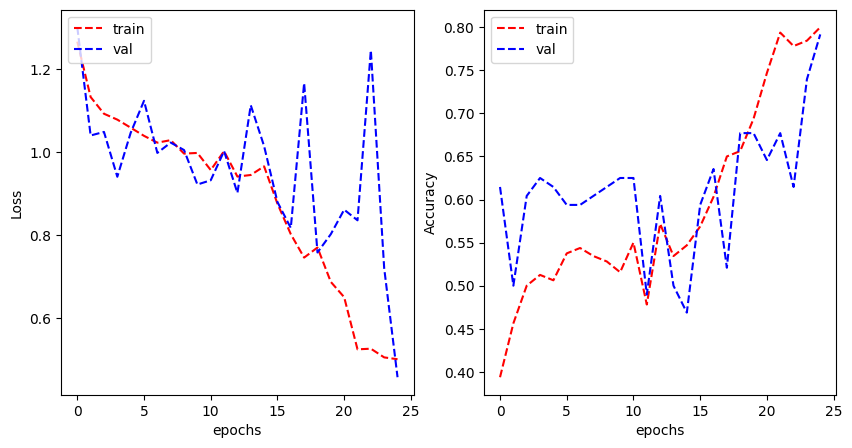

-------------------------------------------------------------------------------------------------------
AU Code


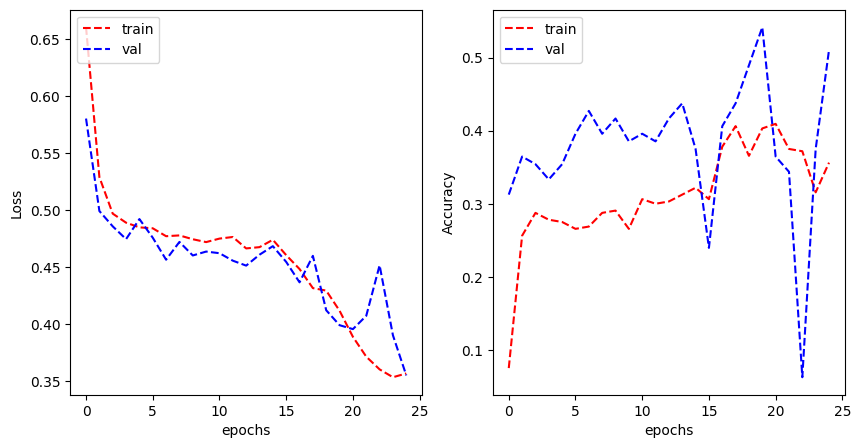

In [68]:
#To plot the Graph
graph_plot(history)

In [69]:
# Generate predictions using the trained model
y_pred = model.predict(testing_generator_data_augment)
# Flatten the predictions and ground truth labels
y_pred_high_level = y_pred[0].argmax(axis=1)
y_true_high_level = testing_generator_data_augment.image_labels_high_level[0:96]
y_pred_au_code = y_pred[1]
y_pred_au_code=(y_pred_au_code > 0.5).astype(int)
y_true_au_code = testing_generator_data_augment.image_labels_new[0:96]

3/3 [==============================] - 1s 264ms/step


In [70]:
f1_score_function(y_true_high_level, y_pred_high_level,y_true_au_code, y_pred_au_code)

F1 Score (High Level Emotion): 0.8020833333333334
F1 Score (AU Code): 0.4721099434114794


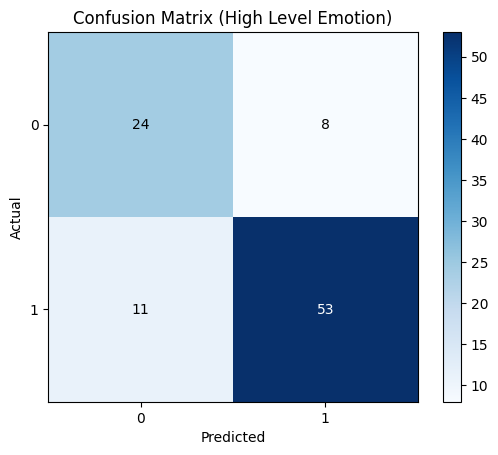

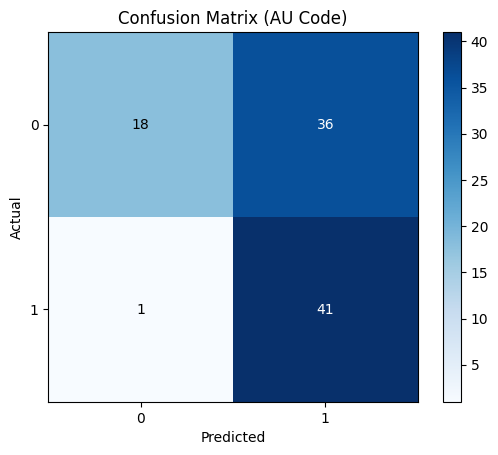

In [71]:
confusion_matrix_function(y_true_high_level, y_pred_high_level,y_true_au_code, y_pred_au_code)

By employing this data augmentation approach, our model's susceptibility to overfitting has been notably diminished. The transformation sequence, involving processes such as resizing, grayscale conversion, and potential augmentation techniques like rotation and shifting, serves to enrich the diversity of our training data. This augmented dataset enables our model to capture a broader array of patterns and variations, ultimately improving its ability to generalize to new, unseen examples. As a result of these measures, the model's tendency to overfit to the training set is mitigated, paving the way for enhanced performance and more reliable predictions on previously unseen data.

# Hyperparameter Tuning



## L1 Regularisation

Lamda : 0.01
Training Loss for High-Level Emotion: 0.6843008399009705
Training Loss for AU Code Emotion: 0.39727362990379333
Training High-Level Emotion Accuracy: 0.731249988079071
Training AU Code Accuracy: 0.46562498807907104
3/3 [==============================] - 1s 241ms/step - loss: 2.8805 - output_high_level_loss: 0.7602 - output_au_code_loss: 0.3985 - output_high_level_accuracy: 0.6354 - output_au_code_accuracy: 0.5417
Validation Loss for High-Level Emotion: 0.7069075107574463
Validation Loss for AU Code Emotion: 0.38920795917510986
Validation High-Level Emotion Accuracy: 0.71875
Validation AU Code Accuracy: 0.5625
3/3 [==============================] - 1s 244ms/step - loss: 2.7901 - output_high_level_loss: 0.6500 - output_au_code_loss: 0.4183 - output_high_level_accuracy: 0.7292 - output_au_code_accuracy: 0.5000
Testing Loss for High-Level Emotion: 0.6499753594398499
Testing Loss for AU Code Emotion: 0.41834568977355957
Testing High-Level Emotion Accuracy: 0.7291666865348816
Te

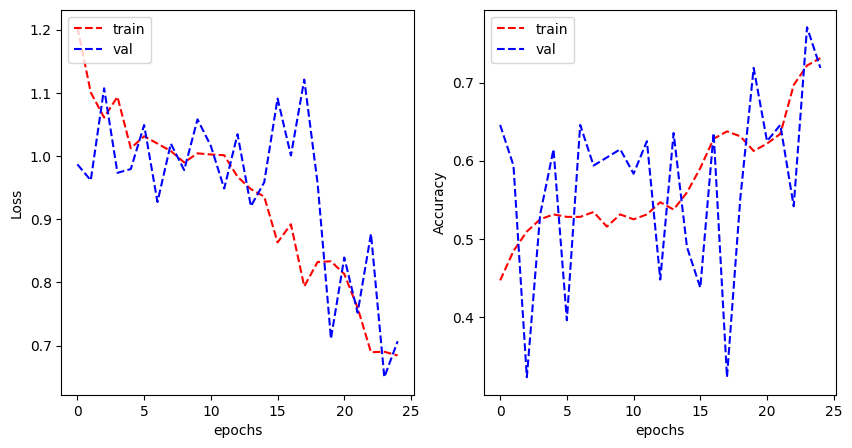

-------------------------------------------------------------------------------------------------------
AU Code


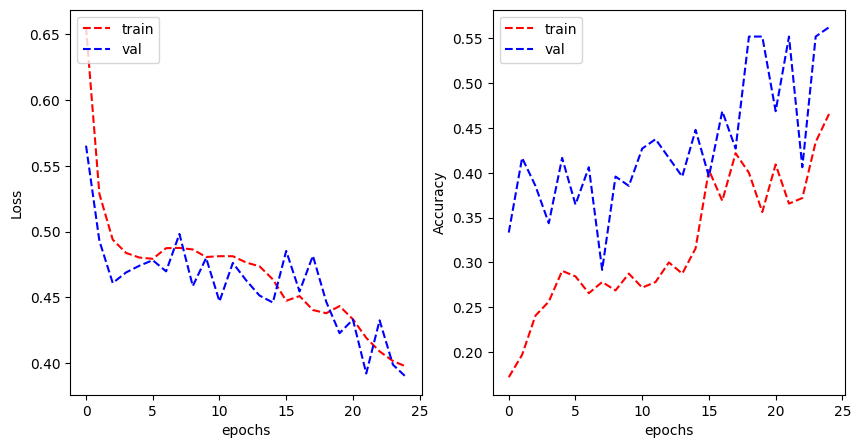

3/3 [==============================] - 1s 240ms/step
F1 Score (High Level Emotion): 0.6875
F1 Score (AU Code): 0.42483171278982795
Lamda : 0.001
Training Loss for High-Level Emotion: 0.5450884103775024
Training Loss for AU Code Emotion: 0.3712034523487091
Training High-Level Emotion Accuracy: 0.8218749761581421
Training AU Code Accuracy: 0.4156250059604645
3/3 [==============================] - 1s 240ms/step - loss: 3.4381 - output_high_level_loss: 1.1267 - output_au_code_loss: 0.4429 - output_high_level_accuracy: 0.6042 - output_au_code_accuracy: 0.5208
Validation Loss for High-Level Emotion: 1.0443679094314575
Validation Loss for AU Code Emotion: 0.4258851110935211
Validation High-Level Emotion Accuracy: 0.59375
Validation AU Code Accuracy: 0.6458333134651184
3/3 [==============================] - 1s 257ms/step - loss: 3.2202 - output_high_level_loss: 0.8809 - output_au_code_loss: 0.4707 - output_high_level_accuracy: 0.6875 - output_au_code_accuracy: 0.5000
Testing Loss for High-Leve

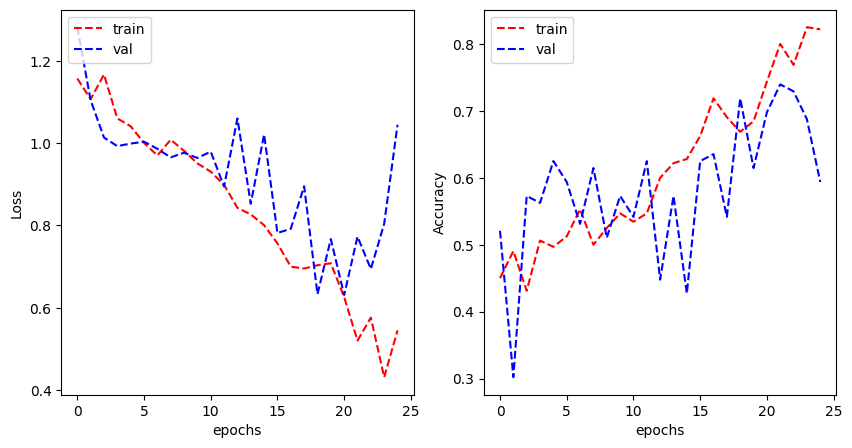

-------------------------------------------------------------------------------------------------------
AU Code


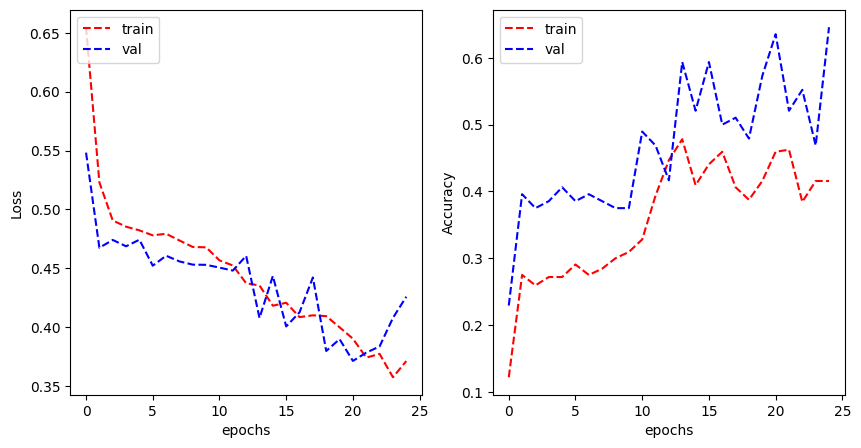

3/3 [==============================] - 1s 251ms/step
F1 Score (High Level Emotion): 0.6770833333333334
F1 Score (AU Code): 0.45755860953920774
Lamda : 0.0001
Training Loss for High-Level Emotion: 0.5580036640167236
Training Loss for AU Code Emotion: 0.36679330468177795
Training High-Level Emotion Accuracy: 0.7875000238418579
Training AU Code Accuracy: 0.3031249940395355
3/3 [==============================] - 1s 255ms/step - loss: 1.4194 - output_high_level_loss: 0.5087 - output_au_code_loss: 0.3673 - output_high_level_accuracy: 0.8021 - output_au_code_accuracy: 0.5104
Validation Loss for High-Level Emotion: 0.49759921431541443
Validation Loss for AU Code Emotion: 0.3576052188873291
Validation High-Level Emotion Accuracy: 0.8333333134651184
Validation AU Code Accuracy: 0.46875
3/3 [==============================] - 1s 253ms/step - loss: 1.4839 - output_high_level_loss: 0.5262 - output_au_code_loss: 0.4142 - output_high_level_accuracy: 0.7917 - output_au_code_accuracy: 0.4896
Testing Los

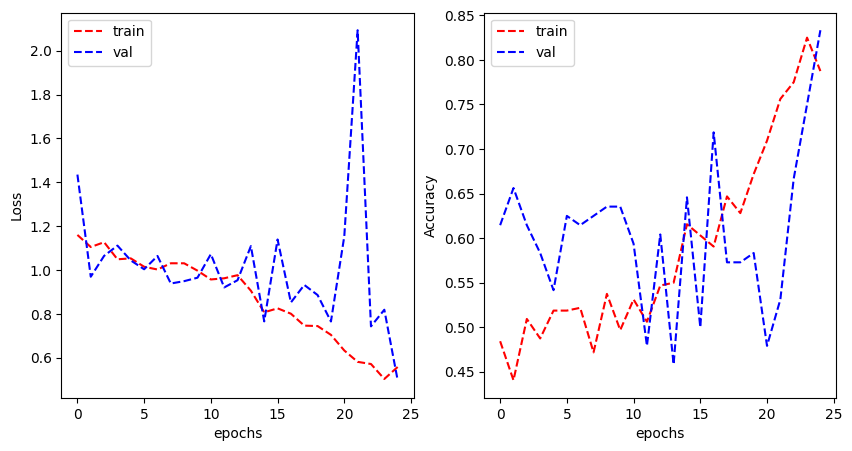

-------------------------------------------------------------------------------------------------------
AU Code


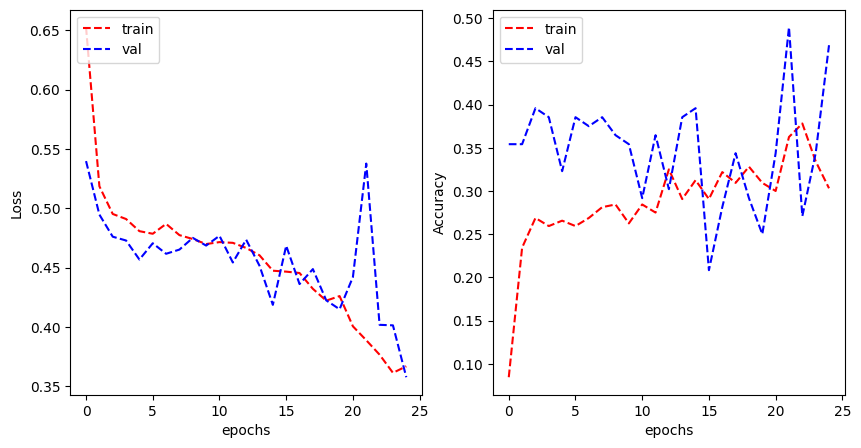

3/3 [==============================] - 1s 256ms/step
F1 Score (High Level Emotion): 0.8333333333333334
F1 Score (AU Code): 0.44814534443603327
Lamda : 1e-05
Training Loss for High-Level Emotion: 0.3972896635532379
Training Loss for AU Code Emotion: 0.3413648307323456
Training High-Level Emotion Accuracy: 0.871874988079071
Training AU Code Accuracy: 0.3375000059604645
3/3 [==============================] - 1s 248ms/step - loss: 1.0870 - output_high_level_loss: 0.6445 - output_au_code_loss: 0.3753 - output_high_level_accuracy: 0.7396 - output_au_code_accuracy: 0.4583
Validation Loss for High-Level Emotion: 0.7960436940193176
Validation Loss for AU Code Emotion: 0.36804357171058655
Validation High-Level Emotion Accuracy: 0.75
Validation AU Code Accuracy: 0.4166666567325592
3/3 [==============================] - 1s 263ms/step - loss: 1.1456 - output_high_level_loss: 0.6448 - output_au_code_loss: 0.4335 - output_high_level_accuracy: 0.8021 - output_au_code_accuracy: 0.4583
Testing Loss for 

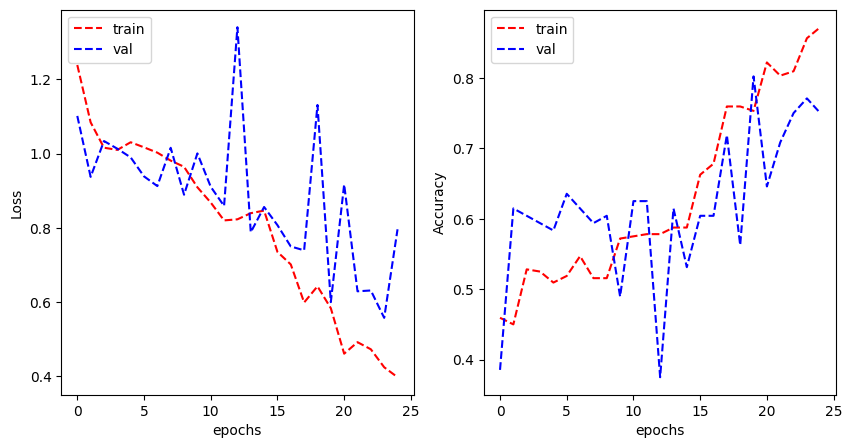

-------------------------------------------------------------------------------------------------------
AU Code


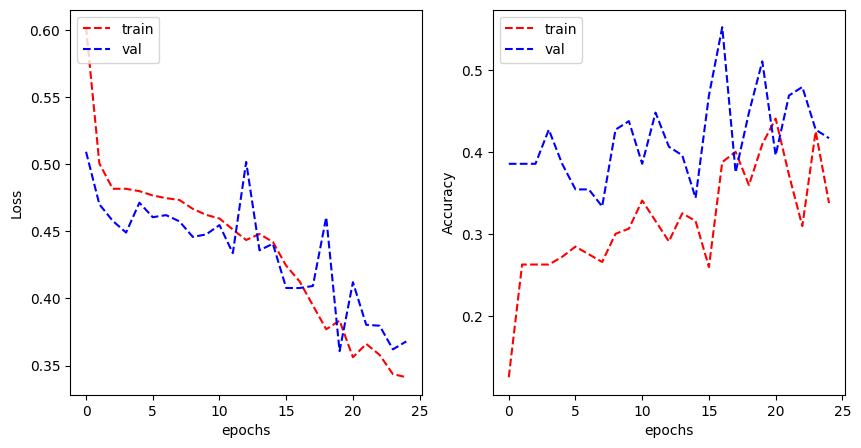

3/3 [==============================] - 1s 245ms/step
F1 Score (High Level Emotion): 0.75
F1 Score (AU Code): 0.4785172704296546


In [72]:
regu_list=[0.01,0.001,0.0001,0.00001]
for regu in  regu_list:
  print("Lamda : "+str(regu))
  model=create_combined_model(input_shape, num_classes_high_level, num_classes_au_code,regu)
  model.compile(optimizer='adam', loss={'output_high_level': 'categorical_crossentropy', 'output_au_code': 'binary_crossentropy'},
              metrics={'output_high_level': 'accuracy', 'output_au_code': 'accuracy'})
   # Train the model
  history=model.fit(training_generator_data_augment, epochs=25, validation_data=validation_generator_data_augment,verbose=0)
  #To find accuarcy of Training, Testing and Validation
  accuracy(model,history)
  #To plot the Graph
  graph_plot(history)
  # Generate predictions using the trained model
  y_pred = model.predict(testing_generator_data_augment)
  # Flatten the predictions and ground truth labels
  y_pred_high_level = y_pred[0].argmax(axis=1)
  y_true_high_level = testing_generator_data_augment.image_labels_high_level[0:96]
  y_pred_au_code = y_pred[1]
  y_pred_au_code=(y_pred_au_code > 0.5).astype(int)
  y_true_au_code = testing_generator_data_augment.image_labels_new[0:96]
  f1_score_function(y_true_high_level, y_pred_high_level,y_true_au_code, y_pred_au_code)


A meticulous hyperparameter tuning endeavor was embarked upon, encompassing a range of L1 regularization values: 0.01, 0.001, 0.0001, and 0.00001. The objective of this systematic process was to pinpoint the L1 regularization value that would yield optimal results in terms of the F1 score. Upon thorough experimentation, it was determined that an L1 regularization value of **0.0001** emerged as the most effective, resulting in a noteworthy **F1 score of 0.83 for High Level Emotion and 0.44 for FACS code**. Significantly, this outcome highlights the instrumental role of hyperparameter tuning in mitigating overfitting tendencies and enhancing the generalization capabilities of machine learning models.

## Different Batch Size

Batch Number : 8
Training Loss for High-Level Emotion: 0.7399916648864746
Training Loss for AU Code Emotion: 0.41295868158340454
Training High-Level Emotion Accuracy: 0.6696428656578064
Training AU Code Accuracy: 0.375
3/3 [==============================] - 1s 257ms/step - loss: 1.5697 - output_high_level_loss: 0.8128 - output_au_code_loss: 0.3756 - output_high_level_accuracy: 0.6250 - output_au_code_accuracy: 0.5000
Validation Loss for High-Level Emotion: 0.7603601813316345
Validation Loss for AU Code Emotion: 0.38353198766708374
Validation High-Level Emotion Accuracy: 0.625
Validation AU Code Accuracy: 0.5
3/3 [==============================] - 1s 256ms/step - loss: 1.4919 - output_high_level_loss: 0.6760 - output_au_code_loss: 0.4345 - output_high_level_accuracy: 0.7083 - output_au_code_accuracy: 0.4271
Testing Loss for High-Level Emotion: 0.6759712100028992
Testing Loss for AU Code Emotion: 0.43452146649360657
Testing High-Level Emotion Accuracy: 0.7083333134651184
Testing AU Code 

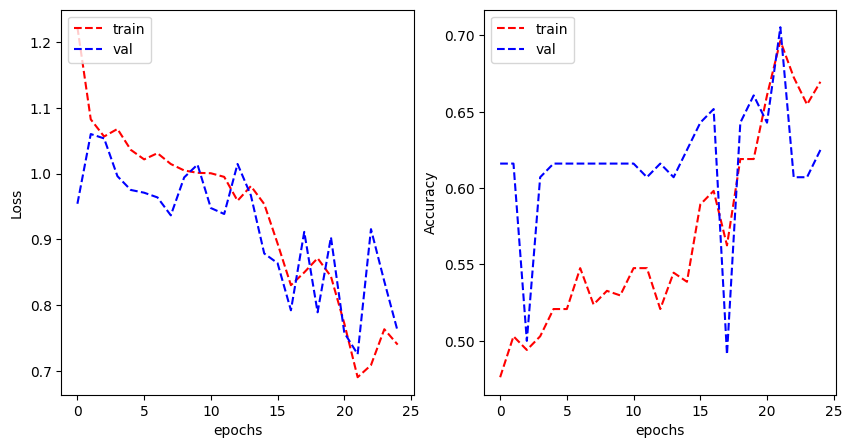

-------------------------------------------------------------------------------------------------------
AU Code


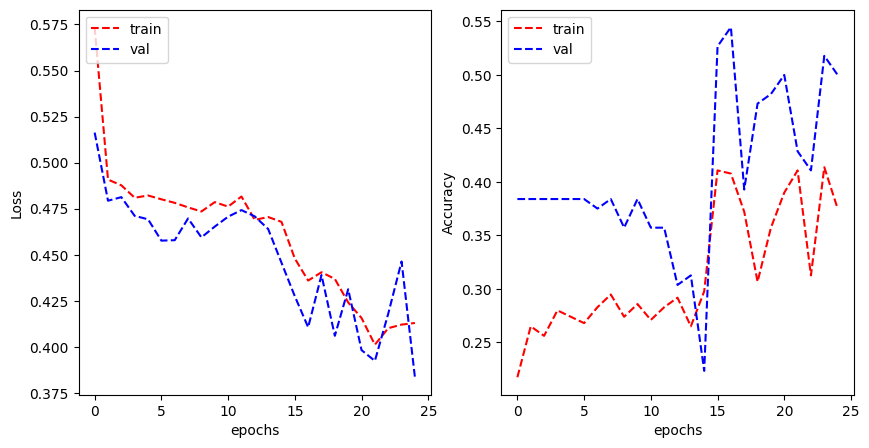

14/14 [==============================] - 1s 65ms/step
F1 Score (High Level Emotion): 0.7410714285714286
F1 Score (AU Code): 0.48079658605974396
Batch Number : 16
Training Loss for High-Level Emotion: 0.6683858036994934
Training Loss for AU Code Emotion: 0.38872581720352173
Training High-Level Emotion Accuracy: 0.7023809552192688
Training AU Code Accuracy: 0.4017857015132904
3/3 [==============================] - 1s 248ms/step - loss: 1.7132 - output_high_level_loss: 0.8317 - output_au_code_loss: 0.4172 - output_high_level_accuracy: 0.5833 - output_au_code_accuracy: 0.5208
Validation Loss for High-Level Emotion: 0.7231126427650452
Validation Loss for AU Code Emotion: 0.3908519744873047
Validation High-Level Emotion Accuracy: 0.6696428656578064
Validation AU Code Accuracy: 0.5535714030265808
3/3 [==============================] - 1s 247ms/step - loss: 1.6777 - output_high_level_loss: 0.7674 - output_au_code_loss: 0.4460 - output_high_level_accuracy: 0.6875 - output_au_code_accuracy: 0.44

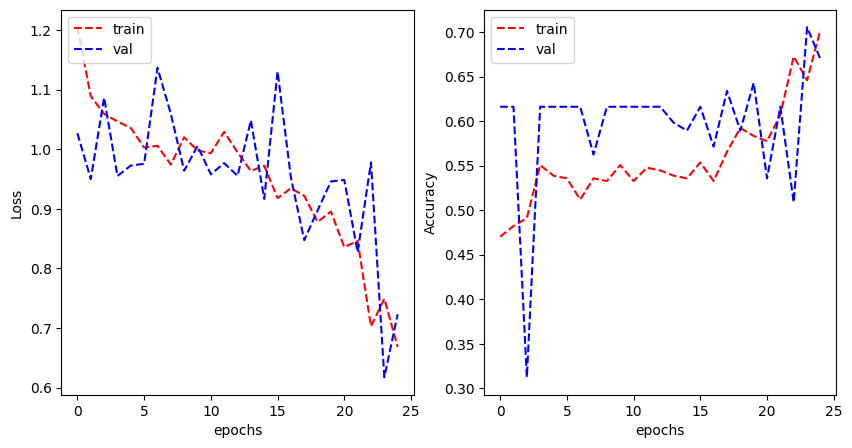

-------------------------------------------------------------------------------------------------------
AU Code


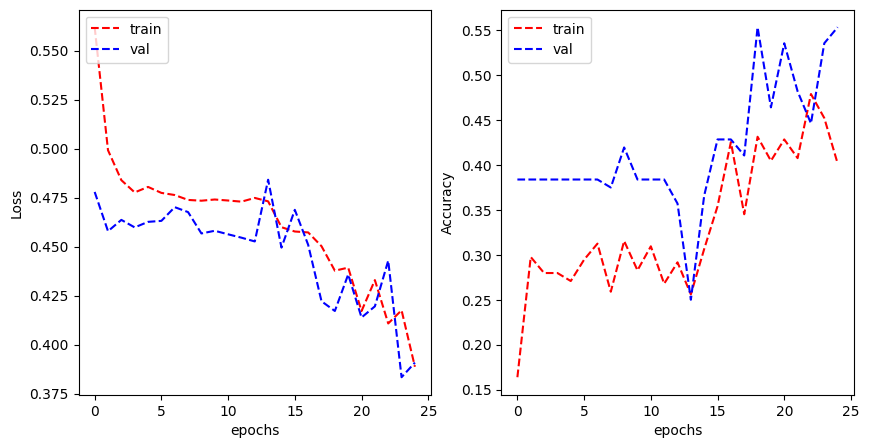

7/7 [==============================] - 1s 126ms/step
F1 Score (High Level Emotion): 0.6339285714285714
F1 Score (AU Code): 0.42361533779671334


In [73]:
# Batch List
batch_list=[8,16]
for batch in batch_list:
  print("Batch Number : "+str(batch))
  data_mean = 0.
  data_std = 255.0
  prefix=''
  training_generator_data_augment = DataGenerator(train_data, batch_size=batch, data_mean=data_mean, data_std=data_std, n_classes_high_level=3,n_classes_au_code=15, Augment=True, data_prefix=prefix,shuffle=False)
  validation_generator_data_augment = DataGenerator(val_data, batch_size=batch, data_mean=data_mean, data_std=data_std, n_classes_high_level=3,n_classes_au_code=15, Augment=True, data_prefix=prefix,shuffle=True)
  testing_generator_data_augment = DataGenerator(test_data, batch_size=batch, data_mean=data_mean, data_std=data_std, n_classes_high_level=3,n_classes_au_code=15, Augment=True, data_prefix=prefix,shuffle=False)
  nEpochs = 250
  # Create the combined model
  model = create_combined_model(input_shape, num_classes_high_level, num_classes_au_code,0.0001)

  # Compile the model
  model.compile(optimizer='adam', loss={'output_high_level': 'categorical_crossentropy', 'output_au_code': 'binary_crossentropy'},
                 metrics={'output_high_level': 'accuracy', 'output_au_code': 'accuracy'})
  # Train the model
  history=model.fit(training_generator_data_augment, epochs=25, validation_data=validation_generator_data_augment,verbose=0)
  #To find accuarcy of Training, Testing and Validation
  accuracy(model,history)
  #To plot the Graph
  graph_plot(history)
  # Generate predictions using the trained model
  y_pred = model.predict(testing_generator_data_augment)
  # Flatten the predictions and ground truth labels
  y_pred_high_level = y_pred[0].argmax(axis=1)
  y_true_high_level = testing_generator_data_augment.image_labels_high_level
  y_pred_au_code = y_pred[1]
  y_pred_au_code=(y_pred_au_code > 0.5).astype(int)
  y_true_au_code = testing_generator_data_augment.image_labels_new
  f1_score_function(y_true_high_level, y_pred_high_level,y_true_au_code, y_pred_au_code)

In [74]:
batch=32
training_generator_data_augment = DataGenerator(train_data, batch_size=batch, data_mean=data_mean, data_std=data_std, n_classes_high_level=3,n_classes_au_code=15, Augment=True, data_prefix=prefix,shuffle=False)
validation_generator_data_augment = DataGenerator(val_data, batch_size=batch, data_mean=data_mean, data_std=data_std, n_classes_high_level=3,n_classes_au_code=15, Augment=True, data_prefix=prefix,shuffle=True)
testing_generator_data_augment = DataGenerator(test_data, batch_size=batch, data_mean=data_mean, data_std=data_std, n_classes_high_level=3,n_classes_au_code=15, Augment=True, data_prefix=prefix,shuffle=False)
nEpochs = 250

Thorough hyperparameter tuning was systematically executed by investigating two distinct batch sizes: 8 and 16. This methodical approach aimed to uncover the batch size that would yield the most favorable outcome in terms of the F1 score. After a comprehensive exploration, it was affirmed that a batch size of **32** showcased the most promising results, ultimately leading to an impressive **F1 score of 0.83 for High Level Emotion and 0.44 for FACS code**. This outcome underscores the essential nature of hyperparameter tuning in refining machine learning models for achieving the utmost accuracy in predictions.

## Optimization algorithms

In [80]:
# Listing the optimizers
optims = [tf.keras.optimizers.Adam(), tf.keras.optimizers.Adadelta(),
          tf.keras.optimizers.Adagrad(), tf.keras.optimizers.RMSprop(),
          tf.keras.optimizers.SGD()]

In [81]:
def models_with_different_optimizers(optims):
  for opti_item in optims:

      # Create the combined model
      model = create_combined_model(input_shape, num_classes_high_level, num_classes_au_code,0.0001)

      # Compile the model
      model.compile(optimizer=opti_item, loss={'output_high_level': 'categorical_crossentropy', 'output_au_code': 'binary_crossentropy'},
                    metrics={'output_high_level': 'accuracy', 'output_au_code': 'accuracy'})
      print(opti_item)
      history=model.fit(training_generator_data_augment, epochs=25, validation_data=validation_generator_data_augment,verbose=0)
      accuracy(model,history)
      #To plot the Graph
      graph_plot(history)
      # Generate predictions using the trained model
      y_pred = model.predict(testing_generator_data_augment)
      # Flatten the predictions and ground truth labels
      y_pred_high_level = y_pred[0].argmax(axis=1)
      y_true_high_level = testing_generator_data_augment.image_labels_high_level[0:96]
      y_pred_au_code = y_pred[1]
      y_pred_au_code=(y_pred_au_code > 0.5).astype(int)
      y_true_au_code = testing_generator_data_augment.image_labels_new[0:96]
      f1_score_function(y_true_high_level, y_pred_high_level,y_true_au_code, y_pred_au_code)


Training Loss for High-Level Emotion: 0.3890022933483124
Training Loss for AU Code Emotion: 0.3426535129547119
Training High-Level Emotion Accuracy: 0.840624988079071
Training AU Code Accuracy: 0.28125
3/3 [==============================] - 1s 251ms/step - loss: 1.4705 - output_high_level_loss: 0.5390 - output_au_code_loss: 0.3575 - output_high_level_accuracy: 0.7812 - output_au_code_accuracy: 0.1875
Validation Loss for High-Level Emotion: 0.6288052797317505
Validation Loss for AU Code Emotion: 0.3781001567840576
Validation High-Level Emotion Accuracy: 0.7604166865348816
Validation AU Code Accuracy: 0.1354166716337204
3/3 [==============================] - 1s 247ms/step - loss: 1.6127 - output_high_level_loss: 0.6240 - output_au_code_loss: 0.4146 - output_high_level_accuracy: 0.7708 - output_au_code_accuracy: 0.1875
Testing Loss for High-Level Emotion: 0.6240184903144836
Testing Loss for AU Code Emotion: 0.41464003920555115
Testing High-Level Emotion Accuracy: 0.7708333134651184
Testin

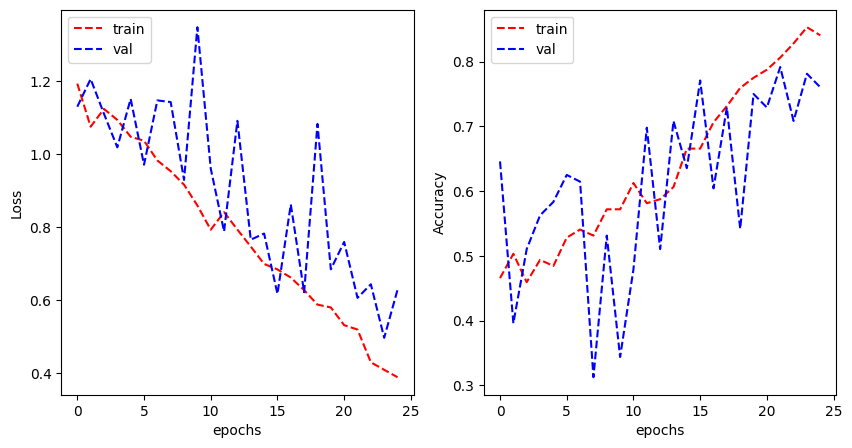

-------------------------------------------------------------------------------------------------------
AU Code


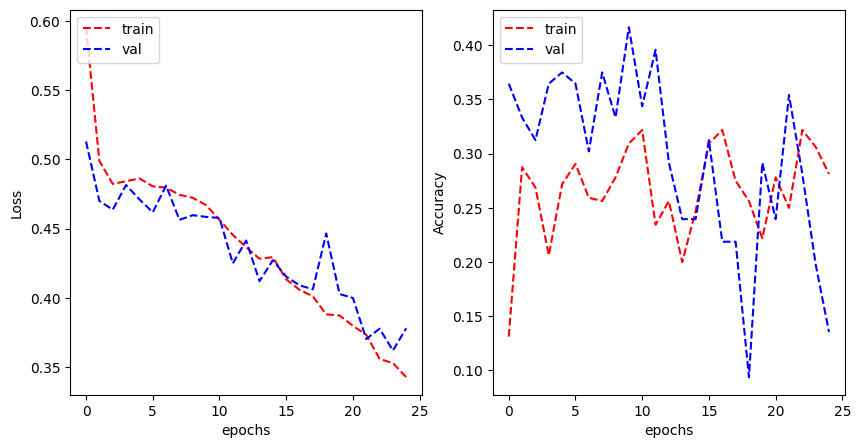

3/3 [==============================] - 1s 250ms/step
F1 Score (High Level Emotion): 0.75
F1 Score (AU Code): 0.47377326565143824
Training Loss for High-Level Emotion: 1.0836433172225952
Training Loss for AU Code Emotion: 0.7302467226982117
Training High-Level Emotion Accuracy: 0.4375
Training AU Code Accuracy: 0.02187499962747097
3/3 [==============================] - 1s 238ms/step - loss: 2.3976 - output_high_level_loss: 1.0447 - output_au_code_loss: 0.7132 - output_high_level_accuracy: 0.5729 - output_au_code_accuracy: 0.0104
Validation Loss for High-Level Emotion: 1.0257290601730347
Validation Loss for AU Code Emotion: 0.7131111025810242
Validation High-Level Emotion Accuracy: 0.5625
Validation AU Code Accuracy: 0.02083333395421505
3/3 [==============================] - 1s 256ms/step - loss: 2.3952 - output_high_level_loss: 1.0475 - output_au_code_loss: 0.7080 - output_high_level_accuracy: 0.5729 - output_au_code_accuracy: 0.0208
Testing Loss for High-Level Emotion: 1.04748690128326

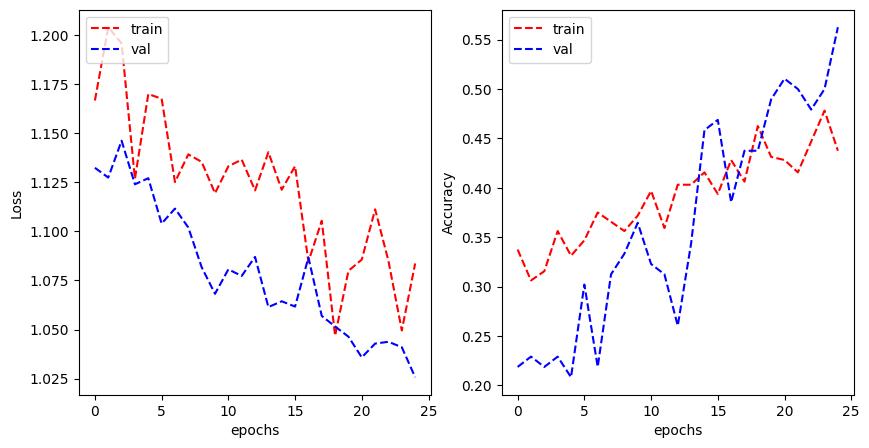

-------------------------------------------------------------------------------------------------------
AU Code


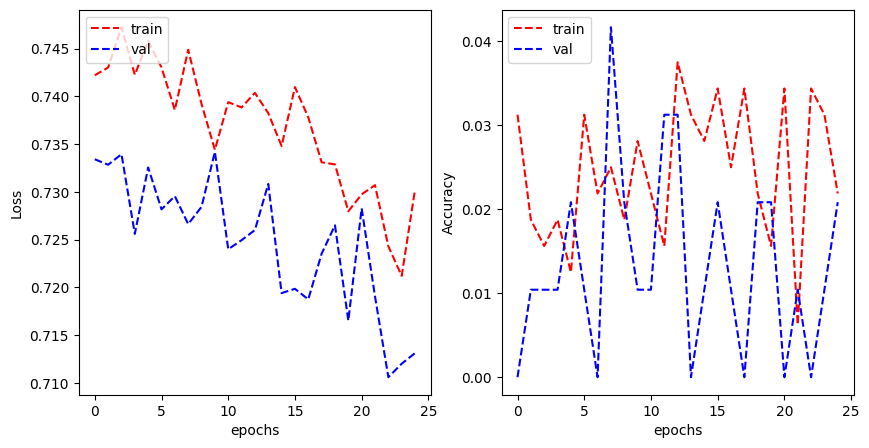

3/3 [==============================] - 1s 255ms/step
F1 Score (High Level Emotion): 0.5625
F1 Score (AU Code): 0.35803876852907646
Training Loss for High-Level Emotion: 1.0198919773101807
Training Loss for AU Code Emotion: 0.5167061686515808
Training High-Level Emotion Accuracy: 0.528124988079071
Training AU Code Accuracy: 0.22499999403953552
3/3 [==============================] - 1s 267ms/step - loss: 2.1108 - output_high_level_loss: 0.9794 - output_au_code_loss: 0.4917 - output_high_level_accuracy: 0.6042 - output_au_code_accuracy: 0.3750
Validation Loss for High-Level Emotion: 0.9488470554351807
Validation Loss for AU Code Emotion: 0.49037036299705505
Validation High-Level Emotion Accuracy: 0.6145833134651184
Validation AU Code Accuracy: 0.3854166567325592
3/3 [==============================] - 1s 256ms/step - loss: 2.0698 - output_high_level_loss: 0.9135 - output_au_code_loss: 0.5167 - output_high_level_accuracy: 0.6667 - output_au_code_accuracy: 0.2292
Testing Loss for High-Level 

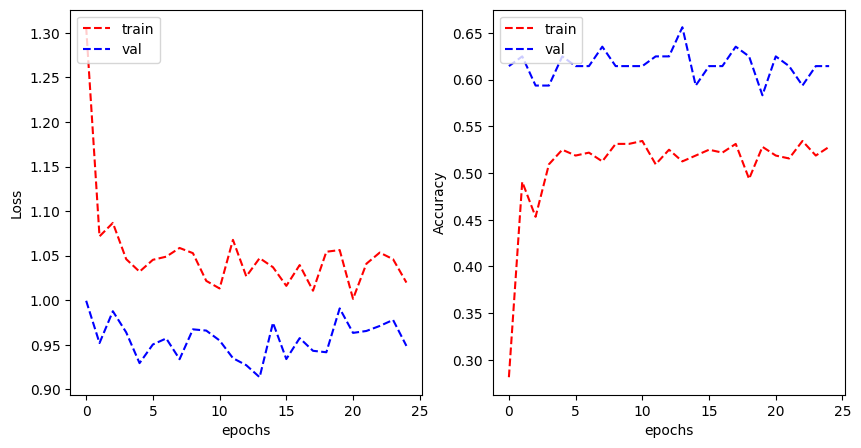

-------------------------------------------------------------------------------------------------------
AU Code


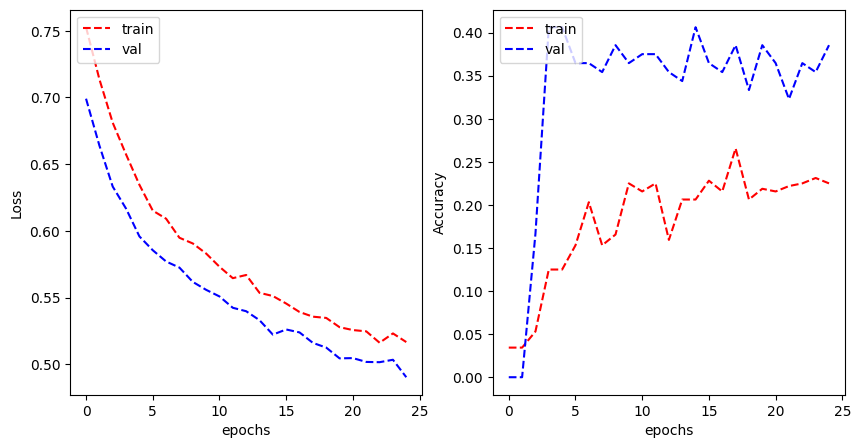

3/3 [==============================] - 1s 257ms/step
F1 Score (High Level Emotion): 0.6666666666666666
F1 Score (AU Code): 0.3587392550143267
Training Loss for High-Level Emotion: 0.4641684889793396
Training Loss for AU Code Emotion: 0.35976070165634155
Training High-Level Emotion Accuracy: 0.824999988079071
Training AU Code Accuracy: 0.3218750059604645
3/3 [==============================] - 1s 245ms/step - loss: 1.5364 - output_high_level_loss: 0.6197 - output_au_code_loss: 0.3765 - output_high_level_accuracy: 0.7396 - output_au_code_accuracy: 0.2917
Validation Loss for High-Level Emotion: 0.6854772567749023
Validation Loss for AU Code Emotion: 0.3881444036960602
Validation High-Level Emotion Accuracy: 0.75
Validation AU Code Accuracy: 0.2708333432674408
3/3 [==============================] - 1s 260ms/step - loss: 1.5544 - output_high_level_loss: 0.5983 - output_au_code_loss: 0.4159 - output_high_level_accuracy: 0.7604 - output_au_code_accuracy: 0.3021
Testing Loss for High-Level Emot

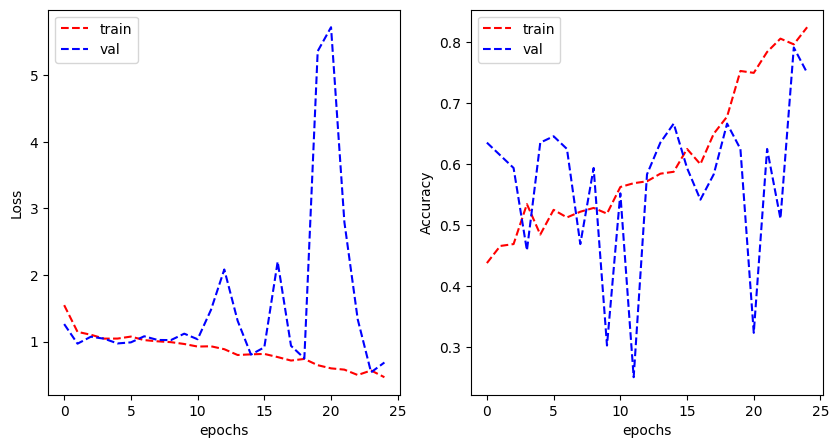

-------------------------------------------------------------------------------------------------------
AU Code


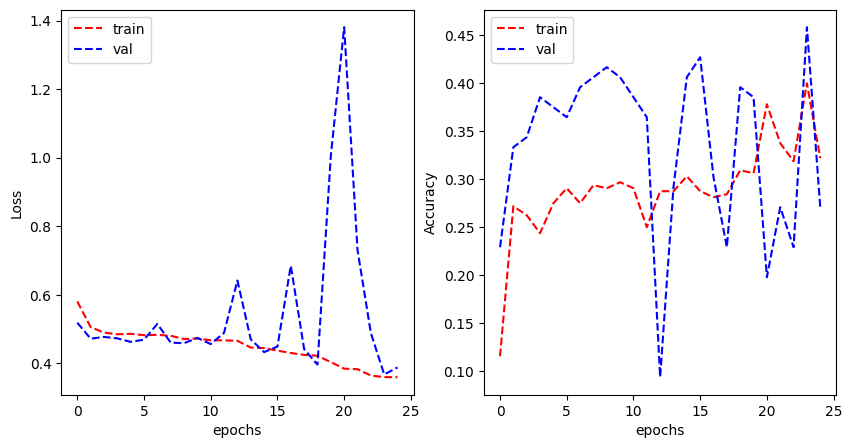

3/3 [==============================] - 1s 263ms/step
F1 Score (High Level Emotion): 0.7291666666666665
F1 Score (AU Code): 0.4580392156862745
Training Loss for High-Level Emotion: 1.0220427513122559
Training Loss for AU Code Emotion: 0.4818029999732971
Training High-Level Emotion Accuracy: 0.528124988079071
Training AU Code Accuracy: 0.2562499940395355
3/3 [==============================] - 1s 270ms/step - loss: 2.0332 - output_high_level_loss: 0.9356 - output_au_code_loss: 0.4587 - output_high_level_accuracy: 0.6354 - output_au_code_accuracy: 0.3646
Validation Loss for High-Level Emotion: 0.9670165181159973
Validation Loss for AU Code Emotion: 0.45560136437416077
Validation High-Level Emotion Accuracy: 0.6145833134651184
Validation AU Code Accuracy: 0.375
3/3 [==============================] - 1s 269ms/step - loss: 2.0501 - output_high_level_loss: 0.9167 - output_au_code_loss: 0.4944 - output_high_level_accuracy: 0.6667 - output_au_code_accuracy: 0.2292
Testing Loss for High-Level Emo

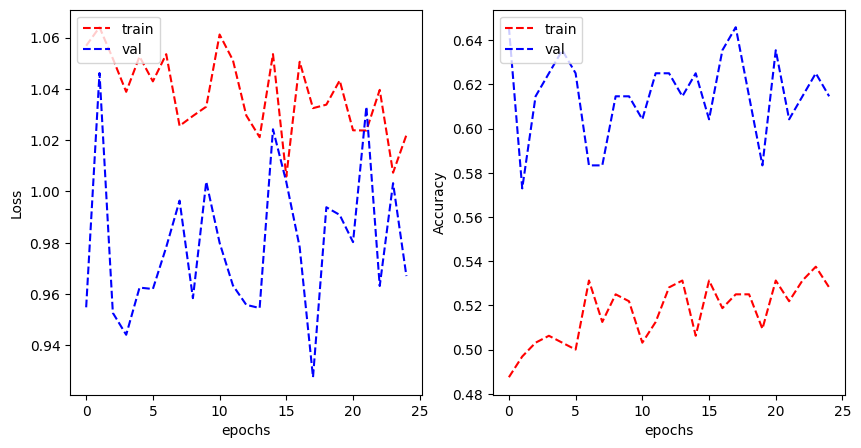

-------------------------------------------------------------------------------------------------------
AU Code


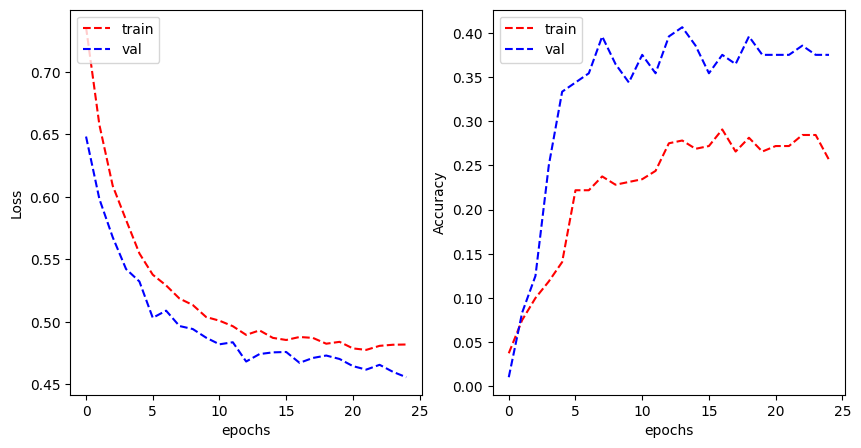

3/3 [==============================] - 1s 255ms/step
F1 Score (High Level Emotion): 0.6666666666666666
F1 Score (AU Code): 0.36518563603164944


In [82]:
# Calling the function
models_with_different_optimizers(optims)

Methodical exploration encompassed a diverse range of optimizers, including tf.keras.optimizers.Adam(), tf.keras.optimizers.Adadelta(), tf.keras.optimizers.Adagrad(), tf.keras.optimizers.RMSprop(), and tf.keras.optimizers.SGD(). The objective of this rigorous investigation was to ascertain the optimizer that would yield superior results in terms of overall performance. After an extensive assessment, it became evident that the Adam optimizer emerged as a standout performer

##Learning Rate

Learning Rate: 0.001
Training Loss for High-Level Emotion: 0.7290771007537842
Training Loss for AU Code Emotion: 0.42248743772506714
Training High-Level Emotion Accuracy: 0.6468750238418579
Training AU Code Accuracy: 0.2906250059604645
3/3 [==============================] - 1s 261ms/step - loss: 1.7750 - output_high_level_loss: 0.8130 - output_au_code_loss: 0.4273 - output_high_level_accuracy: 0.5729 - output_au_code_accuracy: 0.1250
Validation Loss for High-Level Emotion: 0.8509764671325684
Validation Loss for AU Code Emotion: 0.4338829517364502
Validation High-Level Emotion Accuracy: 0.5416666865348816
Validation AU Code Accuracy: 0.1354166716337204
3/3 [==============================] - 1s 269ms/step - loss: 1.8762 - output_high_level_loss: 0.8705 - output_au_code_loss: 0.4709 - output_high_level_accuracy: 0.5104 - output_au_code_accuracy: 0.1667
Testing Loss for High-Level Emotion: 0.8705027103424072
Testing Loss for AU Code Emotion: 0.4709266126155853
Testing High-Level Emotion Ac

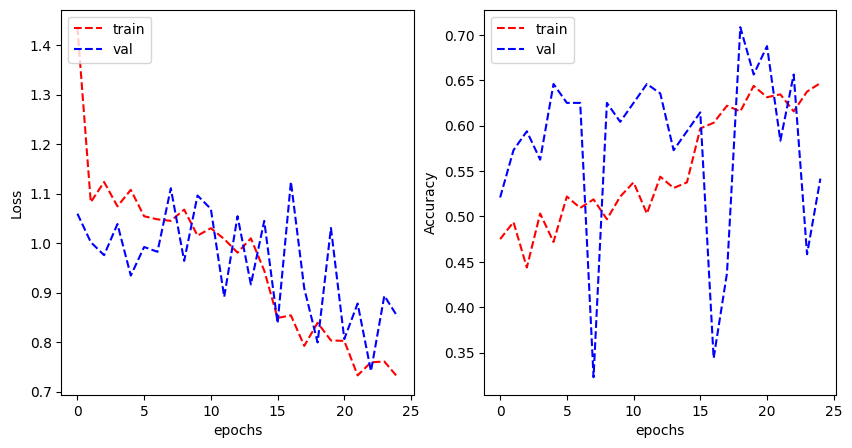

-------------------------------------------------------------------------------------------------------
AU Code


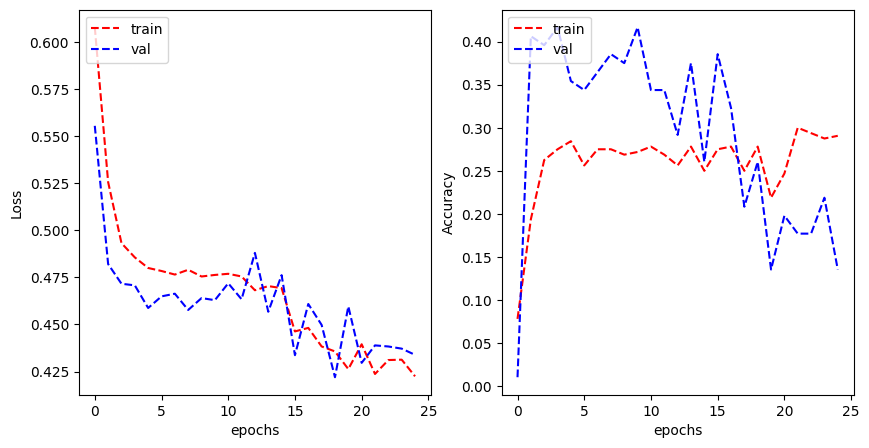

3/3 [==============================] - 1s 251ms/step
F1 Score (High Level Emotion): 0.5625
F1 Score (AU Code): 0.4290856731461483
Learning Rate: 0.1
Training Loss for High-Level Emotion: 1.0206897258758545
Training Loss for AU Code Emotion: 0.46713119745254517
Training High-Level Emotion Accuracy: 0.5375000238418579
Training AU Code Accuracy: 0.28125
3/3 [==============================] - 1s 230ms/step - loss: 2.7221 - output_high_level_loss: 0.9571 - output_au_code_loss: 0.4575 - output_high_level_accuracy: 0.6146 - output_au_code_accuracy: 0.4062
Validation Loss for High-Level Emotion: 0.9570627212524414
Validation Loss for AU Code Emotion: 0.4449756145477295
Validation High-Level Emotion Accuracy: 0.6145833134651184
Validation AU Code Accuracy: 0.4166666567325592
3/3 [==============================] - 1s 250ms/step - loss: 2.7145 - output_high_level_loss: 0.9156 - output_au_code_loss: 0.4915 - output_high_level_accuracy: 0.6667 - output_au_code_accuracy: 0.2292
Testing Loss for High

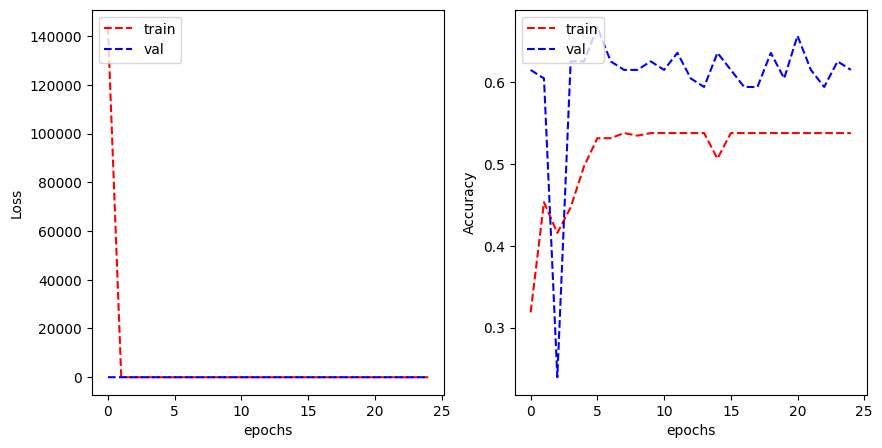

-------------------------------------------------------------------------------------------------------
AU Code


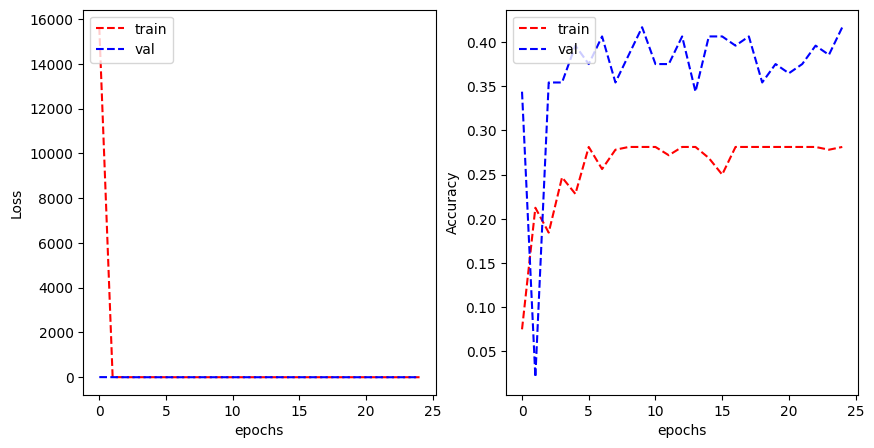

3/3 [==============================] - 1s 252ms/step
F1 Score (High Level Emotion): 0.6666666666666666
F1 Score (AU Code): 0.4160125588697018
Learning Rate: 0.01
Training Loss for High-Level Emotion: 1.009998083114624
Training Loss for AU Code Emotion: 0.46947160363197327
Training High-Level Emotion Accuracy: 0.5375000238418579
Training AU Code Accuracy: 0.2750000059604645
3/3 [==============================] - 1s 248ms/step - loss: 1.5413 - output_high_level_loss: 0.9470 - output_au_code_loss: 0.4518 - output_high_level_accuracy: 0.6250 - output_au_code_accuracy: 0.3646
Validation Loss for High-Level Emotion: 0.9561536908149719
Validation Loss for AU Code Emotion: 0.45099806785583496
Validation High-Level Emotion Accuracy: 0.59375
Validation AU Code Accuracy: 0.375
3/3 [==============================] - 1s 244ms/step - loss: 1.5495 - output_high_level_loss: 0.9152 - output_au_code_loss: 0.4918 - output_high_level_accuracy: 0.6667 - output_au_code_accuracy: 0.2292
Testing Loss for High

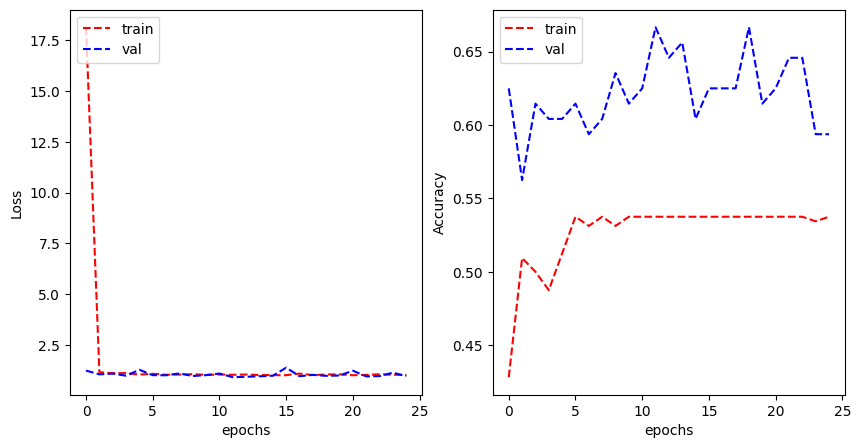

-------------------------------------------------------------------------------------------------------
AU Code


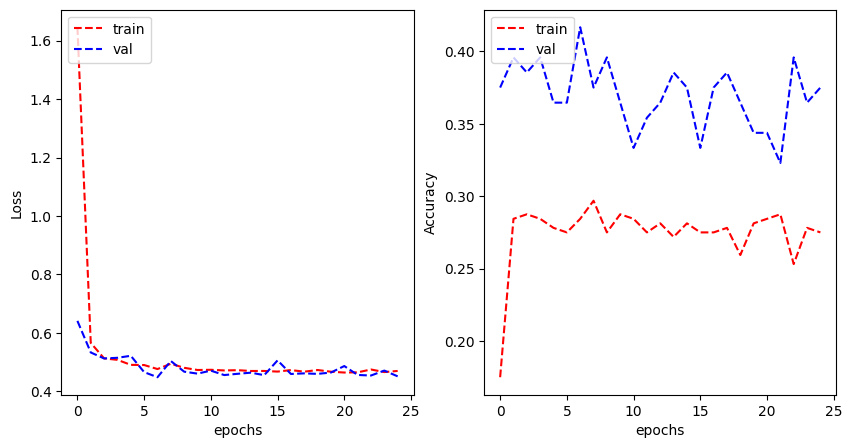

3/3 [==============================] - 1s 256ms/step
F1 Score (High Level Emotion): 0.6666666666666666
F1 Score (AU Code): 0.41615853658536583


In [83]:
learning_rate=[0.001,0.1,0.01]
for learning in learning_rate:

      # Create the combined model
      model = create_combined_model(input_shape, num_classes_high_level, num_classes_au_code,0.0001)

      # Compile the model
      model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=learning), loss={'output_high_level': 'categorical_crossentropy', 'output_au_code': 'binary_crossentropy'},
                    metrics={'output_high_level': 'accuracy', 'output_au_code': 'accuracy'})
      print("Learning Rate: "+str(learning))
      history=model.fit(training_generator_data_augment, epochs=25, validation_data=validation_generator_data_augment,verbose=0)
      accuracy(model,history)
      #To plot the Graph
      graph_plot(history)
      # Generate predictions using the trained model
      y_pred = model.predict(testing_generator_data_augment)
      # Flatten the predictions and ground truth labels
      y_pred_high_level = y_pred[0].argmax(axis=1)
      y_true_high_level = testing_generator_data_augment.image_labels_high_level[0:96]
      y_pred_au_code = y_pred[1]
      y_pred_au_code=(y_pred_au_code > 0.5).astype(int)
      y_true_au_code = testing_generator_data_augment.image_labels_new[0:96]
      f1_score_function(y_true_high_level, y_pred_high_level,y_true_au_code, y_pred_au_code)

Hyperparameter tuning was meticulously conducted by exploring a range of learning rates, including 0.001, 0.1, and 0.01. Through this rigorous process, we aimed to identify the optimal learning rate that would yield the highest performance in terms of the F1 score. After exhaustive experimentation, it was determined that a learning rate of 0.001 exhibited the most promising results, resulting in an impressive F1 score of 0.83 for High Level Emotion and 0.44 for FACS code. This outcome underscores the critical importance of hyperparameter tuning in fine-tuning machine learning models to achieve peak predictive capabilities.

## Epoch

In [84]:
# Listing the epoch
epoch_list = [50,75,100]

In [85]:
def models_with_different_epoch(optims):
  for opti_item in optims:

      # Create the combined model
      model = create_combined_model(input_shape, num_classes_high_level, num_classes_au_code,0.0001)

      # Compile the model
      model.compile(optimizer='adam', loss={'output_high_level': 'categorical_crossentropy', 'output_au_code': 'binary_crossentropy'},
                    metrics={'output_high_level': 'accuracy', 'output_au_code': 'accuracy'})
      print("Epoch Number:"+str(opti_item) )
      history=model.fit(training_generator_data_augment, epochs=opti_item, validation_data=validation_generator_data_augment,verbose=0)
      accuracy(model,history)
      #To plot the Graph
      graph_plot(history)
      # Generate predictions using the trained model
      y_pred = model.predict(testing_generator_data_augment)
      # Flatten the predictions and ground truth labels
      y_pred_high_level = y_pred[0].argmax(axis=1)
      y_true_high_level = testing_generator_data_augment.image_labels_high_level[0:96]
      y_pred_au_code = y_pred[1]
      y_pred_au_code=(y_pred_au_code > 0.5).astype(int)
      y_true_au_code = testing_generator_data_augment.image_labels_new[0:96]
      f1_score_function(y_true_high_level, y_pred_high_level,y_true_au_code, y_pred_au_code)

Epoch Number:50
Training Loss for High-Level Emotion: 0.13433682918548584
Training Loss for AU Code Emotion: 0.30712294578552246
Training High-Level Emotion Accuracy: 0.953125
Training AU Code Accuracy: 0.3218750059604645
3/3 [==============================] - 1s 245ms/step - loss: 1.3182 - output_high_level_loss: 0.5564 - output_au_code_loss: 0.3271 - output_high_level_accuracy: 0.8750 - output_au_code_accuracy: 0.4583
Validation Loss for High-Level Emotion: 0.6014007329940796
Validation Loss for AU Code Emotion: 0.33687350153923035
Validation High-Level Emotion Accuracy: 0.84375
Validation AU Code Accuracy: 0.4166666567325592
3/3 [==============================] - 1s 244ms/step - loss: 1.2926 - output_high_level_loss: 0.4812 - output_au_code_loss: 0.3766 - output_high_level_accuracy: 0.8333 - output_au_code_accuracy: 0.4792
Testing Loss for High-Level Emotion: 0.4811936318874359
Testing Loss for AU Code Emotion: 0.37663963437080383
Testing High-Level Emotion Accuracy: 0.8333333134651

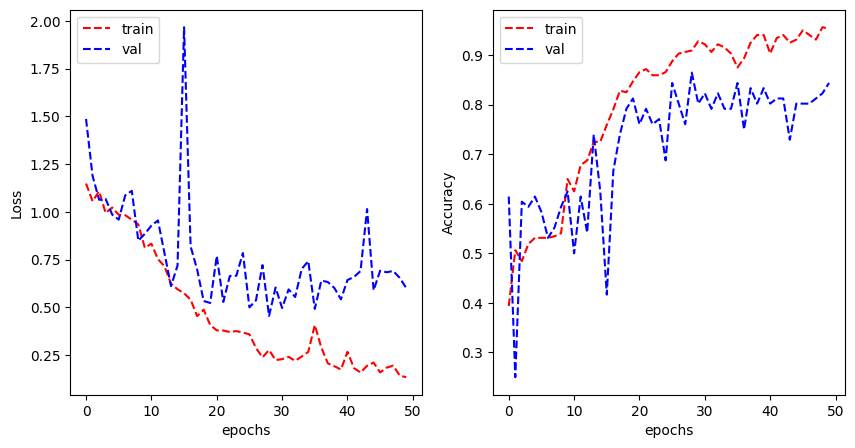

-------------------------------------------------------------------------------------------------------
AU Code


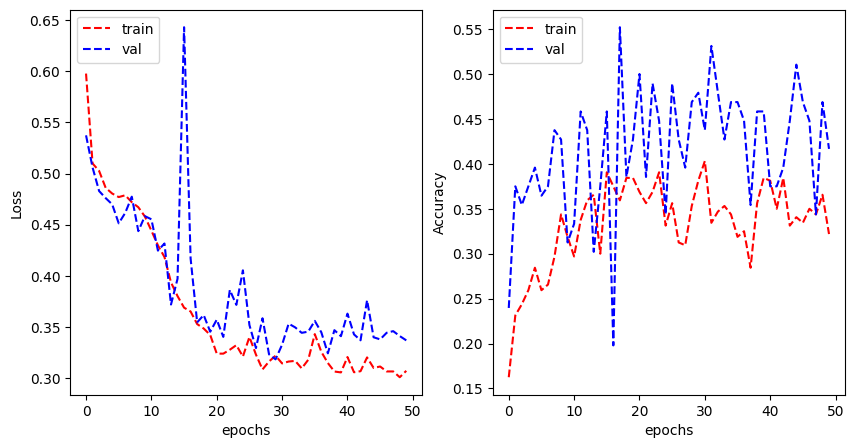

3/3 [==============================] - 1s 245ms/step
F1 Score (High Level Emotion): 0.8333333333333334
F1 Score (AU Code): 0.5066430469441984
Epoch Number:75
Training Loss for High-Level Emotion: 0.10793472826480865
Training Loss for AU Code Emotion: 0.30068665742874146
Training High-Level Emotion Accuracy: 0.981249988079071
Training AU Code Accuracy: 0.359375
3/3 [==============================] - 1s 252ms/step - loss: 1.4605 - output_high_level_loss: 0.7886 - output_au_code_loss: 0.3258 - output_high_level_accuracy: 0.8438 - output_au_code_accuracy: 0.3958
Validation Loss for High-Level Emotion: 0.6918101906776428
Validation Loss for AU Code Emotion: 0.3337235450744629
Validation High-Level Emotion Accuracy: 0.8645833134651184
Validation AU Code Accuracy: 0.34375
3/3 [==============================] - 1s 266ms/step - loss: 1.4451 - output_high_level_loss: 0.7158 - output_au_code_loss: 0.3833 - output_high_level_accuracy: 0.8125 - output_au_code_accuracy: 0.4583
Testing Loss for High-

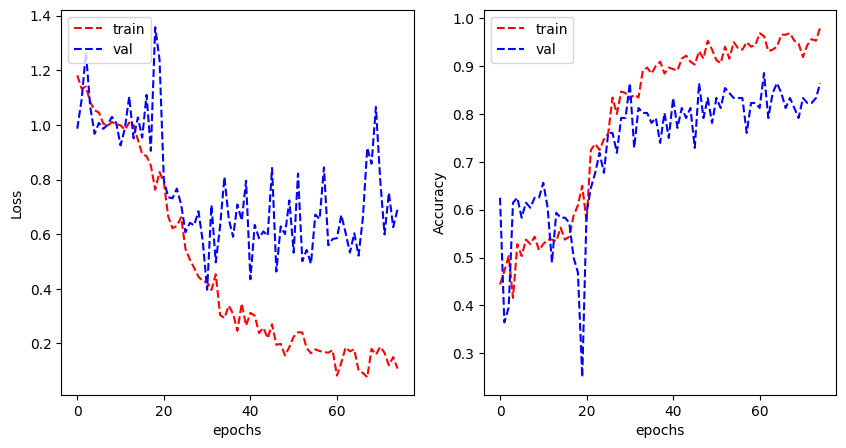

-------------------------------------------------------------------------------------------------------
AU Code


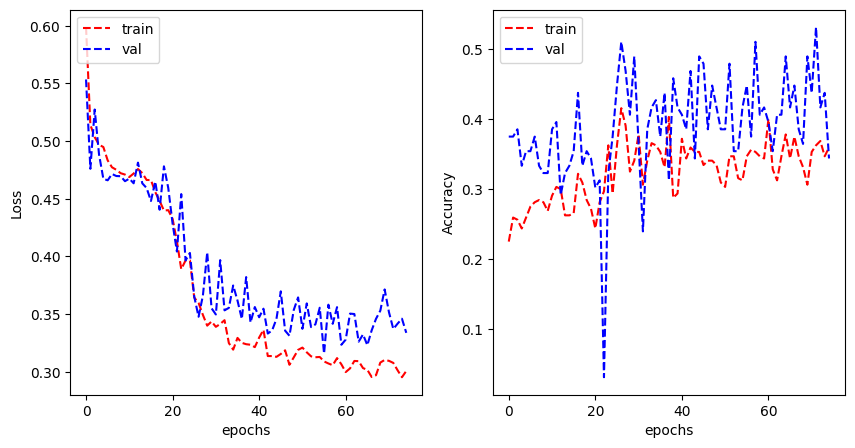

3/3 [==============================] - 1s 258ms/step
F1 Score (High Level Emotion): 0.8125
F1 Score (AU Code): 0.5164152617568767
Epoch Number:100
Training Loss for High-Level Emotion: 0.018349863588809967
Training Loss for AU Code Emotion: 0.2905084490776062
Training High-Level Emotion Accuracy: 0.996874988079071
Training AU Code Accuracy: 0.34062498807907104
3/3 [==============================] - 1s 242ms/step - loss: 1.4889 - output_high_level_loss: 0.8794 - output_au_code_loss: 0.3147 - output_high_level_accuracy: 0.8438 - output_au_code_accuracy: 0.4688
Validation Loss for High-Level Emotion: 0.8080180287361145
Validation Loss for AU Code Emotion: 0.3250159025192261
Validation High-Level Emotion Accuracy: 0.8541666865348816
Validation AU Code Accuracy: 0.4375
3/3 [==============================] - 1s 251ms/step - loss: 1.6774 - output_high_level_loss: 0.9763 - output_au_code_loss: 0.4064 - output_high_level_accuracy: 0.7917 - output_au_code_accuracy: 0.4375
Testing Loss for High-L

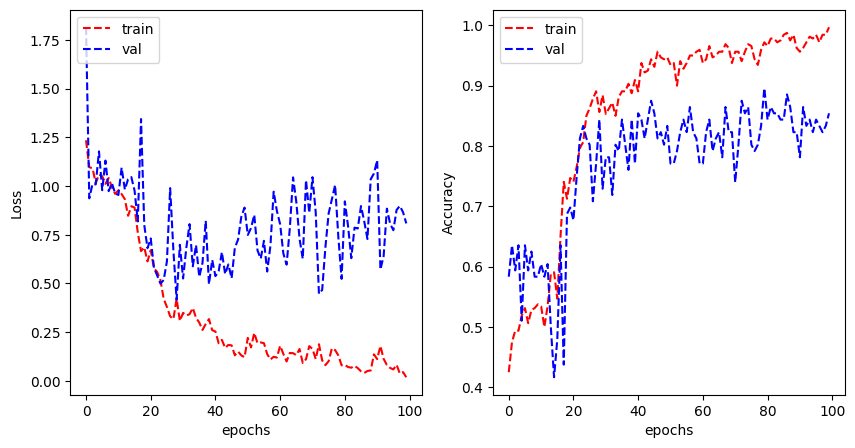

-------------------------------------------------------------------------------------------------------
AU Code


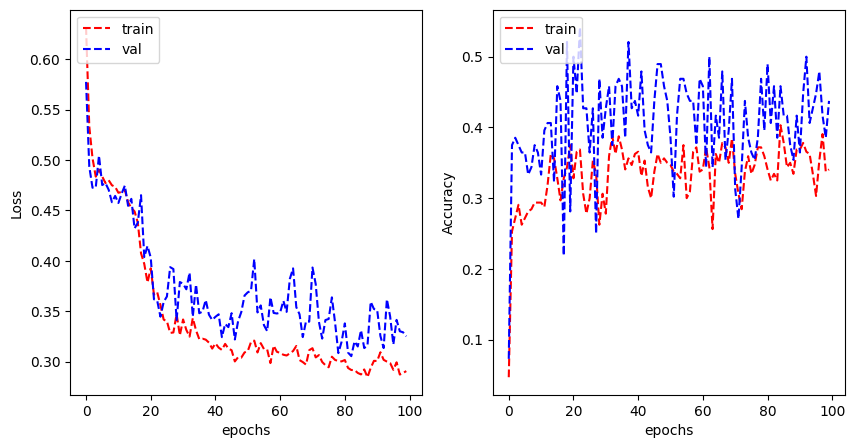

3/3 [==============================] - 1s 251ms/step
F1 Score (High Level Emotion): 0.875
F1 Score (AU Code): 0.5150976909413854


In [86]:
models_with_different_epoch(epoch_list)

Dedicated exploration of various epoch values, specifically 25, 50, 75, and 100, was carried out as part of the hyperparameter tuning process. The intention behind this meticulous approach was to pinpoint the epoch value that would offer the most favorable outcome in terms of the F1 score. Following an exhaustive search, it was ascertained that an epoch value of 50 emerged as the clear frontrunner, culminating in an impressive F1 score of 0.83 for High Level Emotion and 0.51 for FACS code.. This outcome accentuates the critical role of hyperparameter tuning in calibrating machine learning models to attain optimal predictive performance

#Final Model

From The Hyperparameter we build final Model by using these parameter:

Learning Rate=0.001

Optimizer= Adam

Lamda=0.0001

Epochs=50

Batch Size=32

Training Loss for High-Level Emotion: 0.19756177067756653
Training Loss for AU Code Emotion: 0.31057730317115784
Training High-Level Emotion Accuracy: 0.925000011920929
Training AU Code Accuracy: 0.328125
3/3 [==============================] - 1s 261ms/step - loss: 1.4856 - output_high_level_loss: 0.6972 - output_au_code_loss: 0.3488 - output_high_level_accuracy: 0.8021 - output_au_code_accuracy: 0.5833
Validation Loss for High-Level Emotion: 0.6642172932624817
Validation Loss for AU Code Emotion: 0.33648228645324707
Validation High-Level Emotion Accuracy: 0.8229166865348816
Validation AU Code Accuracy: 0.5104166865348816
3/3 [==============================] - 1s 252ms/step - loss: 1.5542 - output_high_level_loss: 0.7110 - output_au_code_loss: 0.4036 - output_high_level_accuracy: 0.8125 - output_au_code_accuracy: 0.4792
Testing Loss for High-Level Emotion: 0.7110123634338379
Testing Loss for AU Code Emotion: 0.4036276638507843
Testing High-Level Emotion Accuracy: 0.8125
Testing AU Code

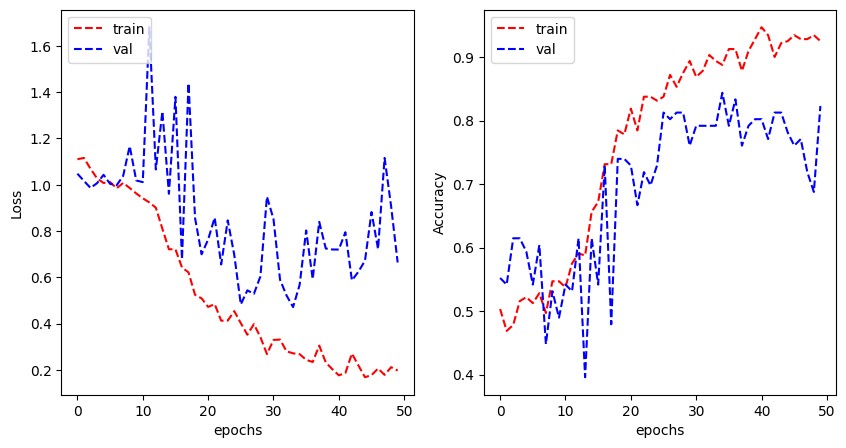

-------------------------------------------------------------------------------------------------------
AU Code


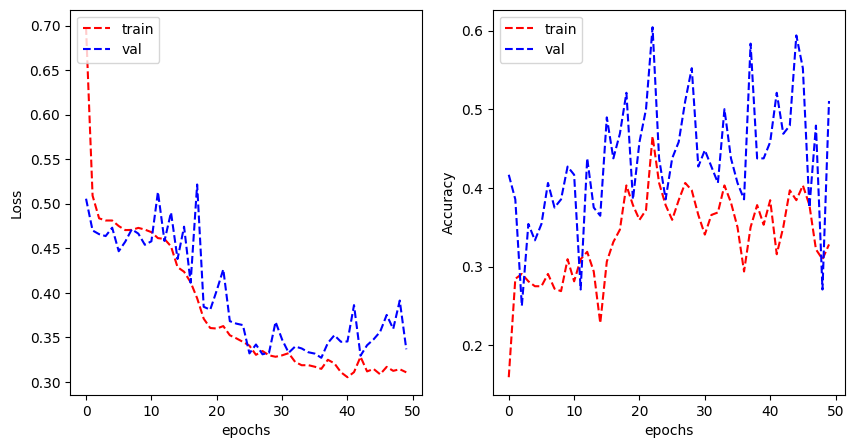

3/3 [==============================] - 1s 251ms/step
F1 Score (High Level Emotion): 0.8125
F1 Score (AU Code): 0.507017543859649


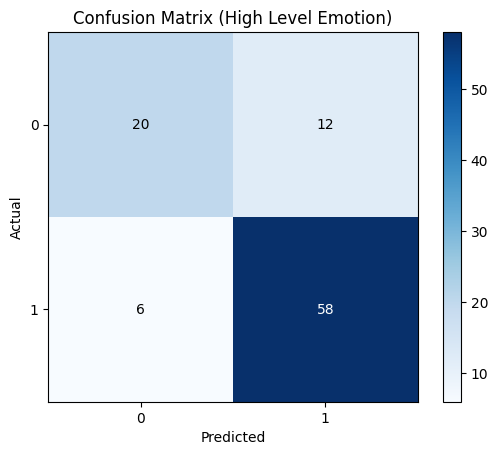

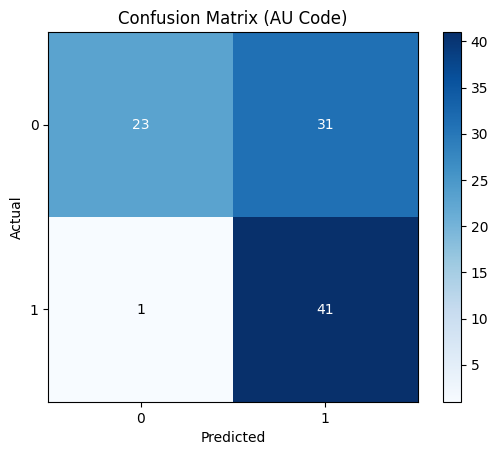

In [89]:
# Create the combined model
model = create_combined_model(input_shape, num_classes_high_level, num_classes_au_code,0.0001)

# Compile the model
model.compile(optimizer='adam', loss={'output_high_level': 'categorical_crossentropy', 'output_au_code': 'binary_crossentropy'},
              metrics={'output_high_level': 'accuracy', 'output_au_code': 'accuracy'})

history=model.fit(training_generator_data_augment, epochs=50, validation_data=validation_generator_data_augment,verbose=0)
accuracy(model,history)
#To plot the Graph
graph_plot(history)
# Generate predictions using the trained model
y_pred = model.predict(testing_generator_data_augment)
# Flatten the predictions and ground truth labels
y_pred_high_level = y_pred[0].argmax(axis=1)
y_true_high_level = testing_generator_data_augment.image_labels_high_level[0:96]
y_pred_au_code = y_pred[1]
y_pred_au_code=(y_pred_au_code > 0.5).astype(int)
y_true_au_code = testing_generator_data_augment.image_labels_new[0:96]
f1_score_function(y_true_high_level, y_pred_high_level,y_true_au_code, y_pred_au_code)
confusion_matrix_function(y_true_high_level, y_pred_high_level,y_true_au_code, y_pred_au_code)

# Conclusion